# ANALISIS BIVARIADO

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt

KeyError: 'PolyCollection:kwdoc'

In [ ]:
df = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\URP\ESTADISTICA CON PYTHON\base de datos\telco.csv', sep=';')

In [ ]:
df.head()  #muestra las 5 primeras filas del dataset

,CodMes,tcsera,TIPO,Geografia,Departamento,Cod_Entidad,Cod_Punto_Venta,Ingresos,Terminal,Color,...,Gama,Precio,Costo_Equipo,prom_llam_201908,prom_llam_201909,prom_llam_201910,prom_llam_201911,prom_llam_201912,Ventana,riesgo_neto_imei
0,201912,1,NO PVAE,LIMA,LIMA,214,1,74.690,BMOBILE TV280,BLANCO,...,GAMA ULTRABAJA,78.0,70.63,0.0,0.0,0.0,0.0,0.0,15,1
1,201912,2,NO PVAE,PROVINCIAS,LAMBAYEQUE,625,1,79.241,BMOBILE AX675,NEGRO,...,GAMA BAJA,NaN,14.03,0.0,0.0,0.0,0.0,0.0,15,1
2,201912,3,NO PVAE,PROVINCIAS,LA LIBERTAD,3557,2,88.951,BMOBILE AX675,NEGRO,...,GAMA BAJA,149.0,14.03,0.0,0.0,0.0,0.0,0.0,15,1
3,201912,4,NO PVAE,PROVINCIAS,ANCASH,5524,17,30.648,BMOBILE AX675,NEGRO,...,GAMA BAJA,150.0,14.03,0.0,0.0,0.0,0.0,0.0,15,1
4,201912,5,NO PVAE,PROVINCIAS,ANCASH,5524,17,30.648,BMOBILE AX675,NEGRO,...,GAMA BAJA,NaN,14.03,0.0,0.0,0.0,0.0,0.0,15,1


In [ ]:
df.columns  #muestra todas las columnas que hay en el dataset

Index(['CodMes', 'tcsera', 'TIPO', 'Geografia', 'Departamento', 'Cod_Entidad',
       'Cod_Punto_Venta', 'Ingresos', 'Terminal', 'Color', 'Marca',
       'Segmento_Equipo', 'Gama', 'Precio', 'Costo_Equipo', 'prom_llam_201908',
       'prom_llam_201909', 'prom_llam_201910', 'prom_llam_201911',
       'prom_llam_201912', 'Ventana', 'riesgo_neto_imei'],
      dtype='object')

In [ ]:
df.info() #muestra las columnas, cantidad de filas, si hay informacion nulla, y el tipo de dato del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19643 entries, 0 to 19642
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodMes            19643 non-null  int64  
 1   tcsera            19643 non-null  int64  
 2   TIPO              19643 non-null  object 
 3   Geografia         19643 non-null  object 
 4   Departamento      19643 non-null  object 
 5   Cod_Entidad       19643 non-null  int64  
 6   Cod_Punto_Venta   19643 non-null  int64  
 7   Ingresos          19643 non-null  float64
 8   Terminal          19635 non-null  object 
 9   Color             19643 non-null  object 
 10  Marca             19643 non-null  object 
 11  Segmento_Equipo   19643 non-null  object 
 12  Gama              19643 non-null  object 
 13  Precio            19628 non-null  float64
 14  Costo_Equipo      19616 non-null  float64
 15  prom_llam_201908  19643 non-null  float64
 16  prom_llam_201909  19643 non-null  float6

In [ ]:
df.describe()  #cantidad de datos, muestra datos estadisticos, el promedio, desviacion standar, min, quartiles 25,50,75, max

,CodMes,tcsera,Cod_Entidad,Cod_Punto_Venta,Ingresos,Precio,Costo_Equipo,prom_llam_201908,prom_llam_201909,prom_llam_201910,prom_llam_201911,prom_llam_201912,Ventana,riesgo_neto_imei
count,19643.0,19643.000000,19643.000000,19643.000000,19643.000000,19628.000000,19616.000000,19643.000000,19643.000000,19643.000000,19643.000000,19643.000000,19643.0,19643.000000
mean,201912.0,9822.000000,3101.773762,17.385226,34.527713,207.904677,21.624654,2.092379,4.065184,1.355404,4.923973,7.310411,15.0,0.286972
std,0.0,5670.590005,1940.183612,43.870339,33.820654,224.078471,24.394138,3.704863,7.343054,4.935191,12.706928,16.215062,0.0,0.452360
min,201912.0,1.000000,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.0,0.000000
25%,201912.0,4911.500000,3505.000000,3.000000,8.001000,129.000000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,15.0,0.000000
50%,201912.0,9822.000000,3522.000000,9.000000,11.799000,129.000000,14.030000,0.600000,1.200000,0.200000,0.400000,1.200000,15.0,0.000000
75%,201912.0,14732.500000,3551.000000,21.000000,72.772000,249.000000,41.750000,2.800000,5.400000,0.800000,4.600000,8.000000,15.0,1.000000
max,201912.0,19643.000000,100000.000000,523.000000,98.852000,3799.000000,99.840000,60.400000,192.800000,192.200000,336.000000,426.600000,15.0,1.000000


In [ ]:
df['Precio'].isnull()

0        False
1         True
2        False
3        False
4         True
         ...  
19638    False
19639    False
19640    False
19641    False
19642    False
Name: Precio, Length: 19643, dtype: bool

In [ ]:
df['Precio'].isnull().sum()

15

In [ ]:
df['Precio'].isnull().mean() #taza de valores nulos

0.0007636308099577458

In [ ]:
#cantidad de valores nulos
df.isnull().sum()

CodMes               0
tcsera               0
TIPO                 0
Geografia            0
Departamento         0
Cod_Entidad          0
Cod_Punto_Venta      0
Ingresos             0
Terminal             8
Color                0
Marca                0
Segmento_Equipo      0
Gama                 0
Precio              15
Costo_Equipo        27
prom_llam_201908     0
prom_llam_201909     0
prom_llam_201910     0
prom_llam_201911     0
prom_llam_201912     0
Ventana              0
riesgo_neto_imei     0
dtype: int64

In [ ]:
df['Precio'].nunique()

57

In [ ]:
def describe_dataframe(df):
  column_descriptions = []  #lista vacia

  for column in df.columns: #barrer cada columna
      column_info = {}
      column_info['variable'] = column

      # Calcular el porcentaje de valores nulos
      null_percentage = df[column].isnull().mean() * 100 #porcetaje de valores nulos con respecto al total de datos
      column_info['nulos'] = round(null_percentage, 2) #redondear a 2 decimales

      # Determinar el tipo de variable
      unique_values = df[column].nunique()
      total_values = len(df[column])
      if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
          column_info['tipo'] = 'Categorical'
          column_info['etiquetas'] = unique_values
      elif pd.api.types.is_numeric_dtype(df[column]):
          if unique_values / total_values < 0.05:
              column_info['tipo'] = 'Discrete'
              column_info['etiquetas'] = unique_values
          else:
              column_info['tipo'] = 'Continuous'
              column_info['etiquetas'] = 'N/A'  # No aplicable para variables continuas
      else:
          column_info['tipo'] = 'Other'
          column_info['etiquetas'] = 'N/A'  # No aplicable para otras variables

      # Verificar la presencia de outliers (solo para variables numéricas)
      if pd.api.types.is_numeric_dtype(df[column]):
          q1 = df[column].quantile(0.25)
          q3 = df[column].quantile(0.85)
          iqr = q3 - q1
          lower_bound = q1 - 1.5 * iqr
          upper_bound = q3 + 1.5 * iqr
          outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
          column_info['outliers'] = 'Yes' if outliers > 0 else 'No'
      else:
          column_info['outliers'] = 'N/A'  # No aplicable para variables no numéricas

      column_descriptions.append(column_info)

  return pd.DataFrame(column_descriptions)

In [ ]:
t_resumen = describe_dataframe(df) #muestra el nombre de la variable, cantidad de datos nulos por variable, etiquetas(cantidad de datos diferentes hay), outliers
t_resumen

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15:

,variable,nulos,tipo,etiquetas,outliers
0,CodMes,0.00,Discrete,1,No
1,tcsera,0.00,Continuous,N/A,No
2,TIPO,0.00,Categorical,1,N/A
3,Geografia,0.00,Categorical,2,N/A
4,Departamento,0.00,Categorical,26,N/A
5,Cod_Entidad,0.00,Discrete,161,Yes
6,Cod_Punto_Venta,0.00,Discrete,74,Yes
7,Ingresos,0.00,Discrete,99,No
8,Terminal,0.04,Other,N/A,N/A
9,Color,0.00,Categorical,21,N/A


Dentro de todos los datos, hay categorias que no nos sirven para realizar el analisis, por lo cual, es
mejor eliminar este tipo de datos que no aportan nada al momento de obtener información útil.

In [ ]:
df.drop(['TIPO','CodMes','Ventana','Cod_Punto_Venta'], axis=1, inplace=True) #eliminar estas columnas que no aportan al analisis, axis=1 -> eliminar columnas, axis=0 -> eliminar filas, inplace -> reemplazar en el dataframe original
t_resumen = describe_dataframe(df)
t_resumen

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\3209423959.py:15:

,variable,nulos,tipo,etiquetas,outliers
0,tcsera,0.00,Continuous,N/A,No
1,Geografia,0.00,Categorical,2,N/A
2,Departamento,0.00,Categorical,26,N/A
3,Cod_Entidad,0.00,Discrete,161,Yes
4,Ingresos,0.00,Discrete,99,No
5,Terminal,0.04,Other,N/A,N/A
6,Color,0.00,Categorical,21,N/A
7,Marca,0.00,Categorical,14,N/A
8,Segmento_Equipo,0.00,Categorical,4,N/A
9,Gama,0.00,Categorical,5,N/A


In [ ]:
type(df.Terminal)

pandas.core.series.Series

In [ ]:
t_resumen[t_resumen.tipo == 'Categorical'] #todas las columnas que tienen el tipo de dato categorical

,variable,nulos,tipo,etiquetas,outliers
1,Geografia,0.0,Categorical,2,N/A
2,Departamento,0.0,Categorical,26,N/A
6,Color,0.0,Categorical,21,N/A
7,Marca,0.0,Categorical,14,N/A
8,Segmento_Equipo,0.0,Categorical,4,N/A
9,Gama,0.0,Categorical,5,N/A


In [ ]:
t_resumen[t_resumen.tipo == 'Discrete'] 

,variable,nulos,tipo,etiquetas,outliers
3,Cod_Entidad,0.00,Discrete,161,Yes
4,Ingresos,0.00,Discrete,99,No
10,Precio,0.08,Discrete,57,Yes
11,Costo_Equipo,0.14,Discrete,170,No
12,prom_llam_201908,0.00,Discrete,166,Yes
13,prom_llam_201909,0.00,Discrete,274,Yes
14,prom_llam_201910,0.00,Discrete,222,Yes
15,prom_llam_201911,0.00,Discrete,413,Yes
16,prom_llam_201912,0.00,Discrete,515,Yes
17,riesgo_neto_imei,0.00,Discrete,2,No


In [ ]:
t_resumen[t_resumen.tipo == 'Continuous'] 

,variable,nulos,tipo,etiquetas,outliers
0,tcsera,0.0,Continuous,N/A,No


# Variables categóricas

In [ ]:
df[['Gama','Geografia']].head()

,Gama,Geografia
0,GAMA ULTRABAJA,LIMA
1,GAMA BAJA,PROVINCIAS
2,GAMA BAJA,PROVINCIAS
3,GAMA BAJA,PROVINCIAS
4,GAMA BAJA,PROVINCIAS


In [ ]:
pd.crosstab(df['Gama'],df['Geografia'])

Geografia,LIMA,PROVINCIAS
Gama,,
GAMA ALTA,246,377
GAMA BAJA,3025,3979
GAMA MEDIA,980,1240
GAMA PREMIUM,13,24
GAMA ULTRABAJA,4909,4850


In [ ]:
#tabla de contingencia
tabla = pd.crosstab(df['Gama'],df['Geografia'], normalize='index') #normalize index sacar el porcentaje de filas, de equipos vendidos en lima y en provincias, ambos valores suman 1
tabla

Geografia,LIMA,PROVINCIAS
Gama,,
GAMA ALTA,0.394864,0.605136
GAMA BAJA,0.431896,0.568104
GAMA MEDIA,0.441441,0.558559
GAMA PREMIUM,0.351351,0.648649
GAMA ULTRABAJA,0.503023,0.496977


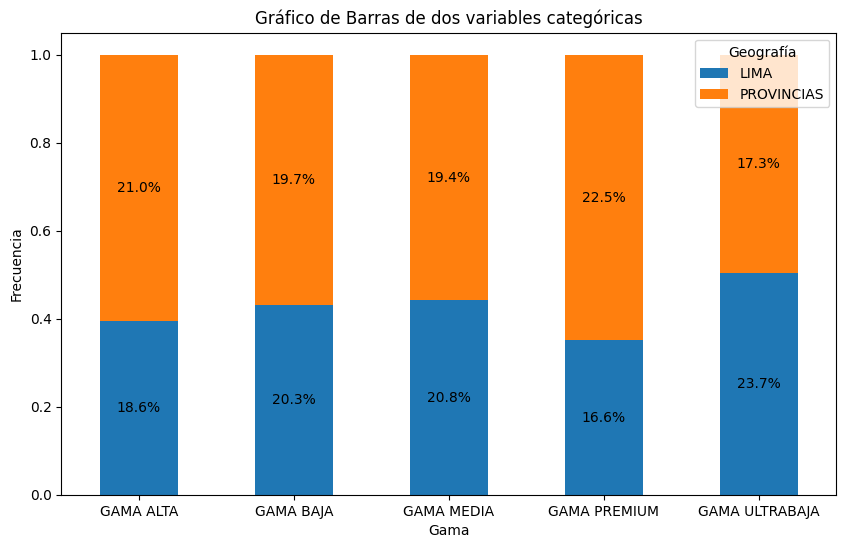

In [ ]:
ax = tabla.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Gráfico de Barras de dos variables categóricas')
plt.xlabel('Gama')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Geografía')

# Función para formatear las etiquetas como porcentajes
def pct_formatter(value):
    tot = sum(value)  # Calcular el total de la barra actual
    return f"{value / tot * 100:.1f}%"  # Formatear como porcentaje

def pct_formatter(values):
    total = sum(values)
    return [f"{value / total * 100:.1f}%" for value in values]

# Agregar etiquetas a las barras como porcentajes
for container in ax.containers:
    # Obtener los valores de cada barra
    values = [patch.get_height() for patch in container]
    # Formatear los valores como porcentajes
    labels = pct_formatter(values)
    # Agregar las etiquetas a la barra
    ax.bar_label(container, labels=labels, label_type='center')

In [ ]:
#tabla de contingencia
tabla = pd.crosstab(df['Gama'],df['Geografia'], normalize='columns') #normalize index sacar el porcentaje de columnas, de equipos vendidos en lima y en provincias, ambos valores suman 1
tabla

Geografia,LIMA,PROVINCIAS
Gama,,
GAMA ALTA,0.026818,0.036008
GAMA BAJA,0.329772,0.380038
GAMA MEDIA,0.106835,0.118434
GAMA PREMIUM,0.001417,0.002292
GAMA ULTRABAJA,0.535158,0.463228


In [ ]:
tabla.T  #rotar filas con columnas, matriz transpuesta

Gama,GAMA ALTA,GAMA BAJA,GAMA MEDIA,GAMA PREMIUM,GAMA ULTRABAJA
Geografia,,,,,
LIMA,0.026818,0.329772,0.106835,0.001417,0.535158
PROVINCIAS,0.036008,0.380038,0.118434,0.002292,0.463228


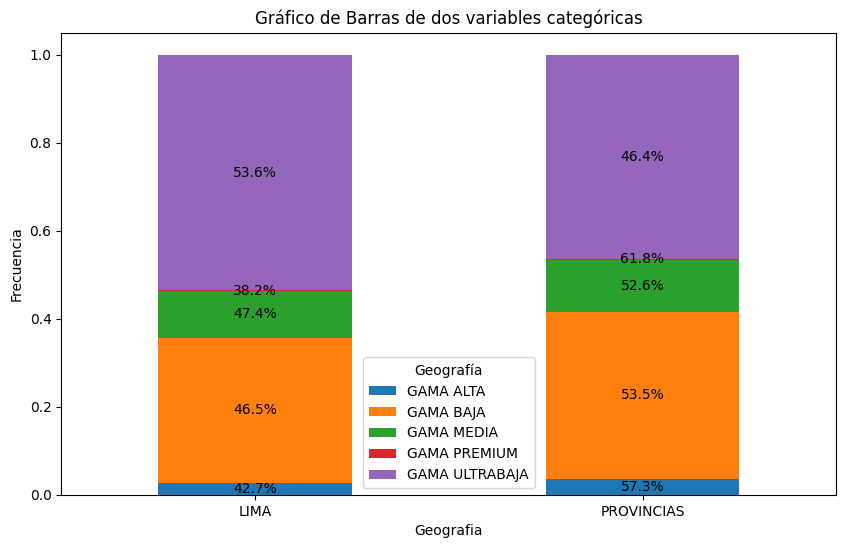

In [ ]:
ax = tabla.T.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Gráfico de Barras de dos variables categóricas')
plt.xlabel('Geografia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Geografía')

# Función para formatear las etiquetas como porcentajes
def pct_formatter(value):
    tot = sum(value)  # Calcular el total de la barra actual
    return f"{value / tot * 100:.1f}%"  # Formatear como porcentaje

def pct_formatter(values):
    total = sum(values)
    return [f"{value / total * 100:.1f}%" for value in values]

# Agregar etiquetas a las barras como porcentajes
for container in ax.containers:
    # Obtener los valores de cada barra
    values = [patch.get_height() for patch in container]
    # Formatear los valores como porcentajes
    labels = pct_formatter(values)
    # Agregar las etiquetas a la barra
    ax.bar_label(container, labels=labels, label_type='center')

In [ ]:
# Tabla de contingencia
tabla=pd.crosstab(df['Gama'], df['Geografia'])
tabla

Geografia,LIMA,PROVINCIAS
Gama,,
GAMA ALTA,246,377
GAMA BAJA,3025,3979
GAMA MEDIA,980,1240
GAMA PREMIUM,13,24
GAMA ULTRABAJA,4909,4850


ANALIZANDO LA PARTE NUMERICA

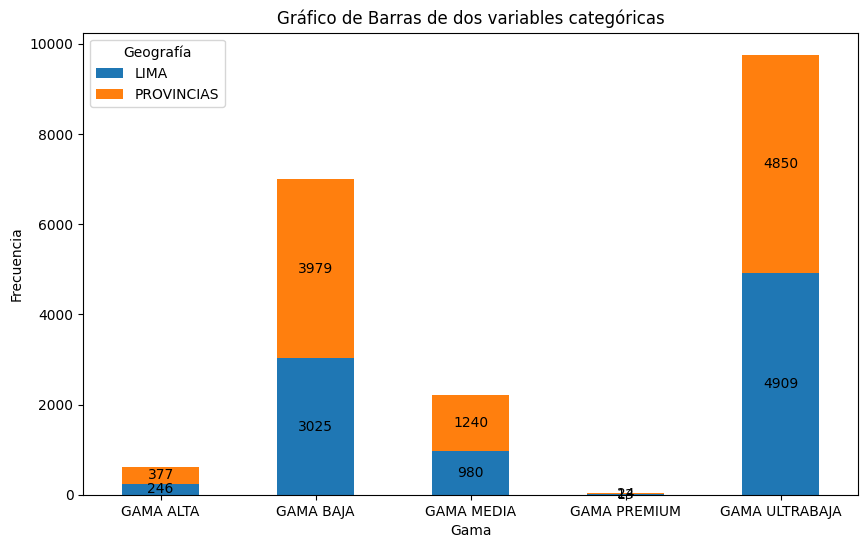

In [ ]:
ax = tabla.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Gráfico de Barras de dos variables categóricas')
plt.xlabel('Gama')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Geografía')

# Agregar etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center')

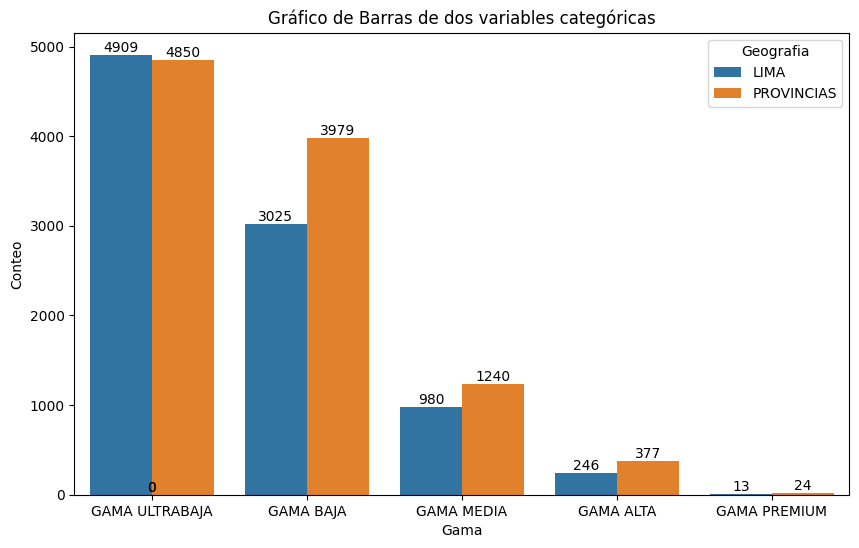

In [ ]:
# Graficar el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gama', hue='Geografia')
plt.title('Gráfico de Barras de dos variables categóricas')
plt.xlabel('Gama')
plt.ylabel('Conteo')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

Agarrando 2 valores de datos catagoricas diferentes: gama y segmente_equipo


In [ ]:
tabla=pd.crosstab(df['Gama'], df['Segmento_Equipo'])
tabla

Segmento_Equipo,BASICO,MULTIMEDIA,PENDIENTE,SMARTPHONE
Gama,,,,
GAMA ALTA,0,0,0,623
GAMA BAJA,0,10,2,6992
GAMA MEDIA,0,0,1,2219
GAMA PREMIUM,0,0,0,37
GAMA ULTRABAJA,1,4229,9,5520


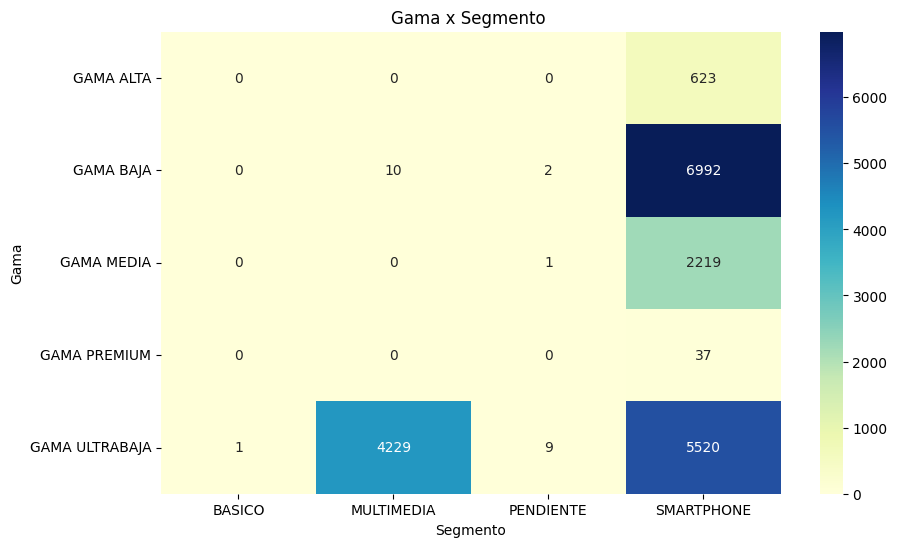

In [ ]:
# Crear el heatmap (mapa de calor)
plt.figure(figsize=(10, 6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Personalizar el gráfico
plt.title('Gama x Segmento ')
plt.xlabel('Segmento')
plt.ylabel('Gama')

# Mostrar el gráfico
plt.show()

# VARIABLES NÚMERICAS

En las variables númericas se apoya bastante en graficos de dispersión

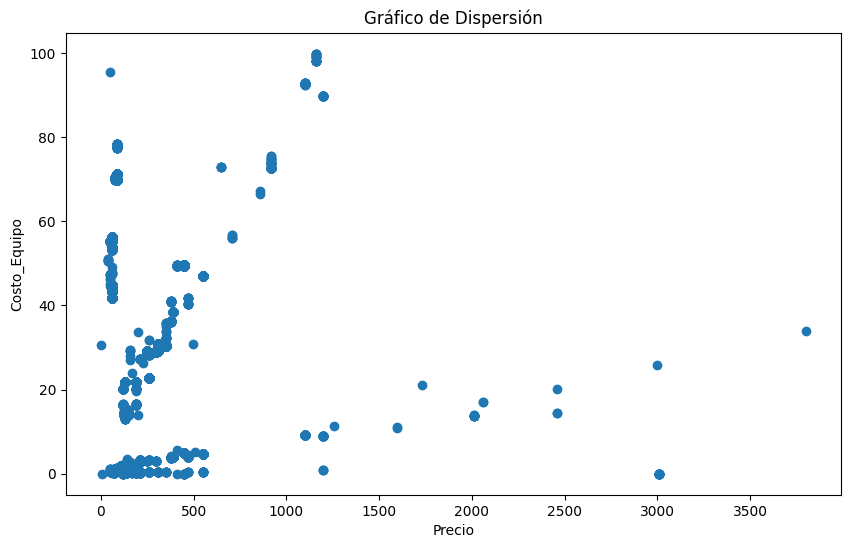

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Precio'], df['Costo_Equipo'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Precio')
plt.ylabel('Costo_Equipo')
plt.show()

<Axes: xlabel='Precio', ylabel='Costo_Equipo'>

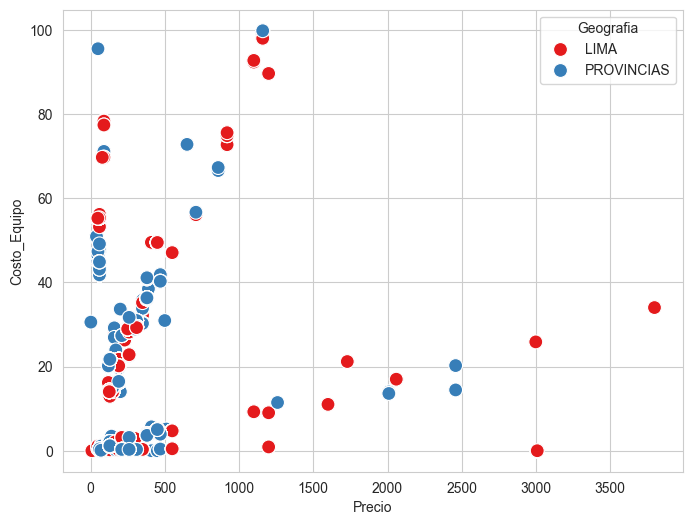

In [ ]:
# Gráfico de dispersión de una variable numerica(Precio, Costo_Equipo) con una variable categorica (Geografia)
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='Precio', y='Costo_Equipo', hue='Geografia', palette='Set1', s=100)

In [ ]:
t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable

0               tcsera
3          Cod_Entidad
4             Ingresos
10              Precio
11        Costo_Equipo
12    prom_llam_201908
13    prom_llam_201909
14    prom_llam_201910
15    prom_llam_201911
16    prom_llam_201912
17    riesgo_neto_imei
Name: variable, dtype: object

In [ ]:
t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.unique() 

array(['tcsera', 'Cod_Entidad', 'Ingresos', 'Precio', 'Costo_Equipo',
       'prom_llam_201908', 'prom_llam_201909', 'prom_llam_201910',
       'prom_llam_201911', 'prom_llam_201912', 'riesgo_neto_imei'],
      dtype=object)

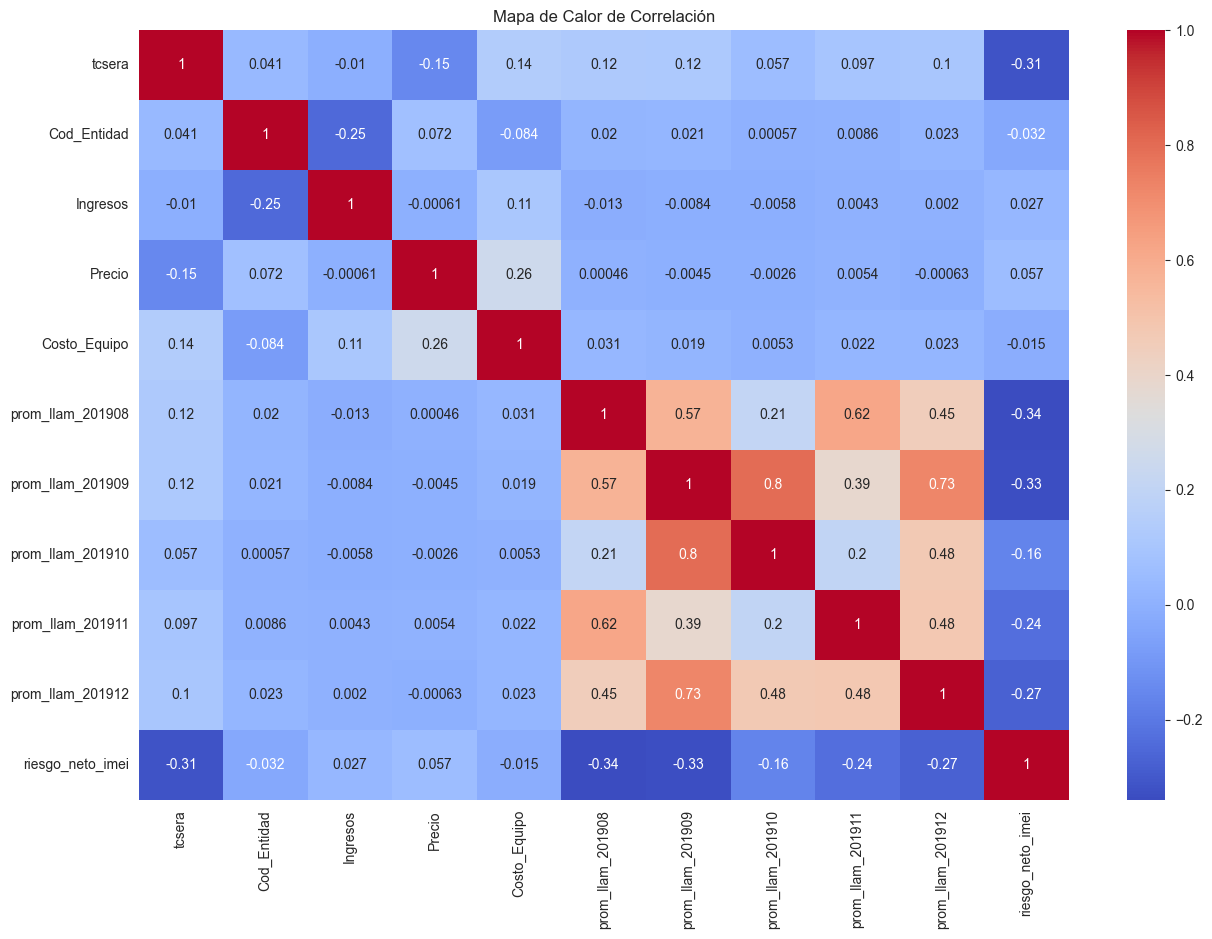

In [ ]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 10)) #tamaño de la imagen
corr_matrix = df[t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.unique()].corr() #de la tabla resumen df[t_resumen], solo considera los tipo de datos discretos y continuos, y obten la correlacion
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Realizar la correlacion mediante un valore de referencia K, para delimitar el rango de valores

In [ ]:
k=0.5 
corr_matrix[(corr_matrix >= k)|(corr_matrix <= -k)]

,tcsera,Cod_Entidad,Ingresos,Precio,Costo_Equipo,prom_llam_201908,prom_llam_201909,prom_llam_201910,prom_llam_201911,prom_llam_201912,riesgo_neto_imei
tcsera,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cod_Entidad,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingresos,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precio,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Costo_Equipo,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
prom_llam_201908,NaN,NaN,NaN,NaN,NaN,1.000000,0.573813,NaN,0.619943,NaN,NaN
prom_llam_201909,NaN,NaN,NaN,NaN,NaN,0.573813,1.000000,0.800966,NaN,0.726135,NaN
prom_llam_201910,NaN,NaN,NaN,NaN,NaN,NaN,0.800966,1.000000,NaN,NaN,NaN
prom_llam_201911,NaN,NaN,NaN,NaN,NaN,0.619943,NaN,NaN,1.000000,NaN,NaN
prom_llam_201912,NaN,NaN,NaN,NaN,NaN,NaN,0.726135,NaN,NaN,1.000000,NaN


<Axes: >

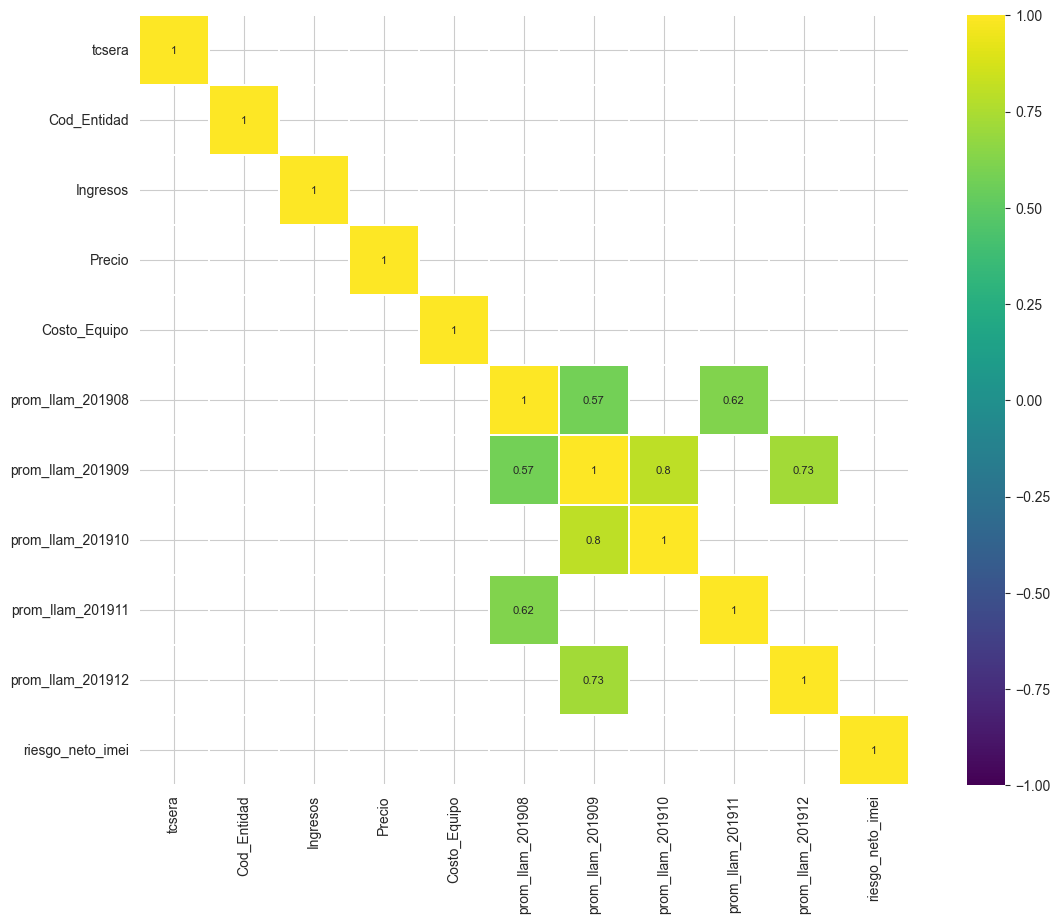

In [ ]:
var_=t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.to_list()
# var_=[x for x in var_ if x not in ['id','NObeyesdad']]
corr = df[var_].corr() # We already examined SalePrice correlations
plt.figure(figsize=(15, 10))
k = 0.5
sns.heatmap(corr[(corr >= k) | (corr <= -k)], #tomar de referencia un valor en este caso 0.5
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [ ]:
var_[1:5]

['Cod_Entidad', 'Ingresos', 'Precio', 'Costo_Equipo']

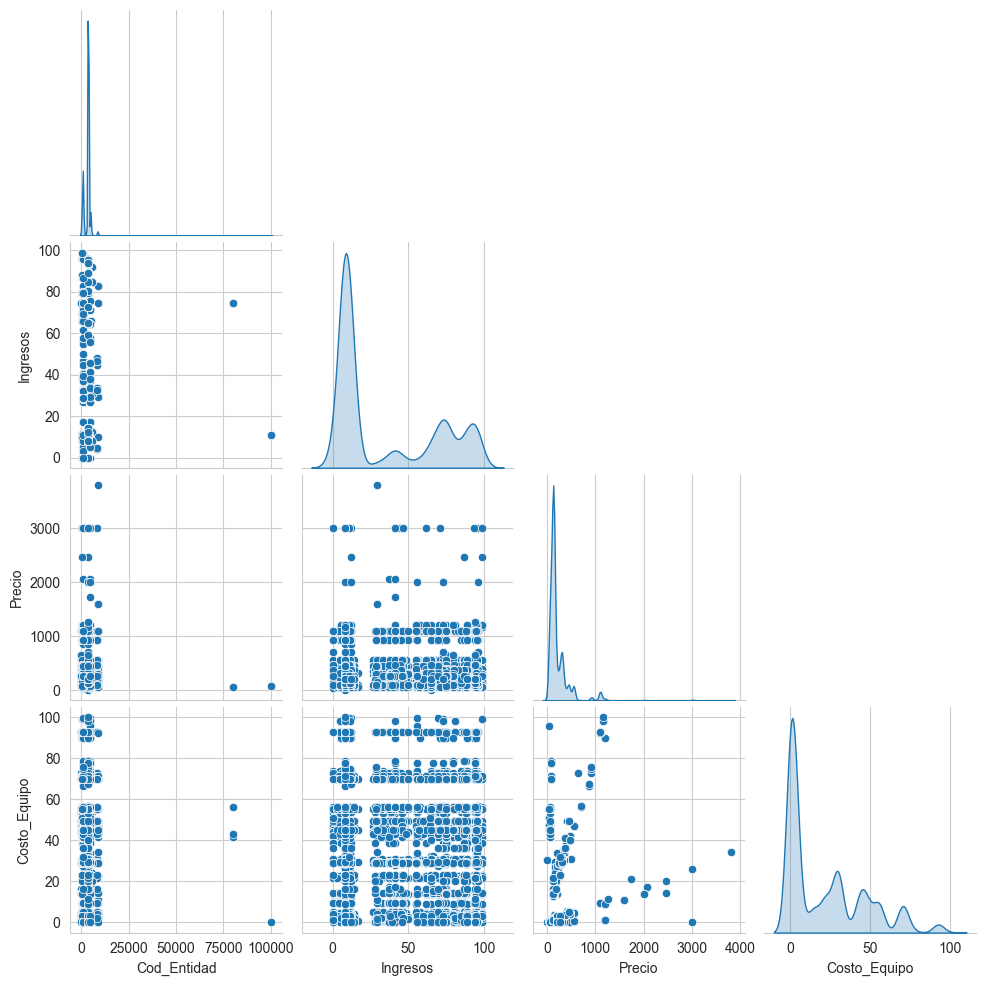

In [ ]:
# Graficar el gráfico de matriz de dispersión
var_=t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.to_list()
sns.pairplot(df[var_[1:5]], diag_kind="kde", corner=True) #diag_kind="kde" -> cambia el grafico de barras por una densidad, corner=True -> elimina los graficos duplicados

# Mostrar el gráfico
plt.show()

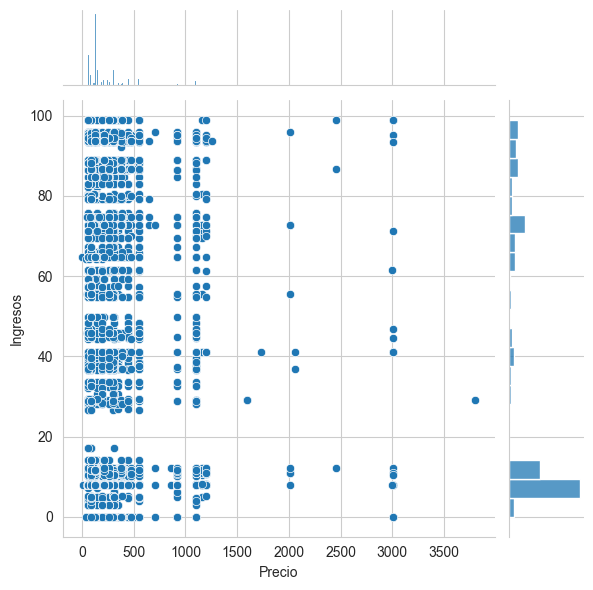

In [ ]:
sns.jointplot(x = 'Precio', y = 'Ingresos', data = df)

# RELACIÓN ENTRE VARIABLES CATEGORICA Y NUMÉRICA

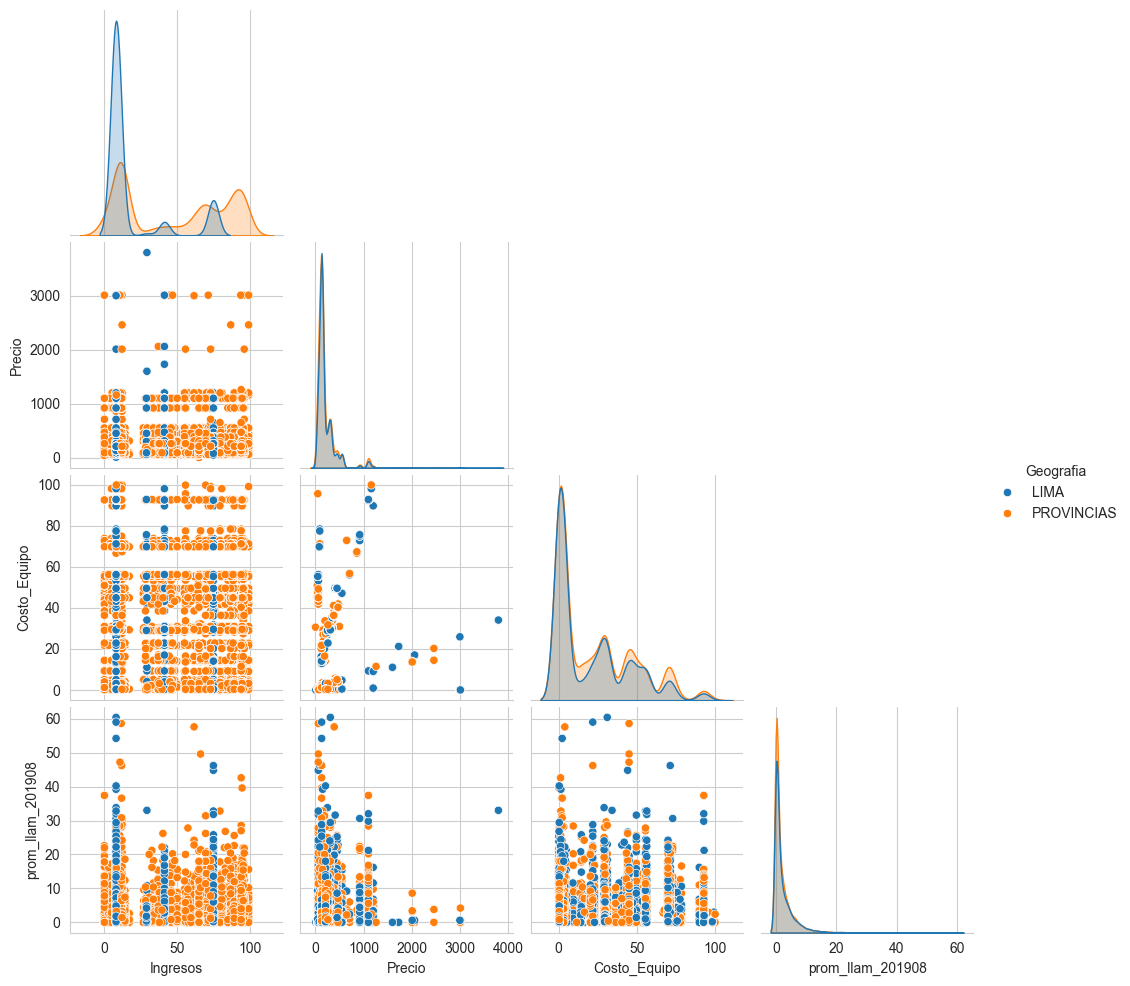

In [ ]:
# Graficar el gráfico de matriz de dispersión
var_=t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.to_list()
sns.pairplot(df[['Ingresos', 'Precio', 'Costo_Equipo', 'prom_llam_201908','Geografia']], diag_kind="kde", corner=True, hue='Geografia')

# Mostrar el gráfico
plt.show()

In [ ]:
t_resumen

,variable,nulos,tipo,etiquetas,outliers
0,tcsera,0.00,Continuous,N/A,No
1,Geografia,0.00,Categorical,2,N/A
2,Departamento,0.00,Categorical,26,N/A
3,Cod_Entidad,0.00,Discrete,161,Yes
4,Ingresos,0.00,Discrete,99,No
5,Terminal,0.04,Other,N/A,N/A
6,Color,0.00,Categorical,21,N/A
7,Marca,0.00,Categorical,14,N/A
8,Segmento_Equipo,0.00,Categorical,4,N/A
9,Gama,0.00,Categorical,5,N/A


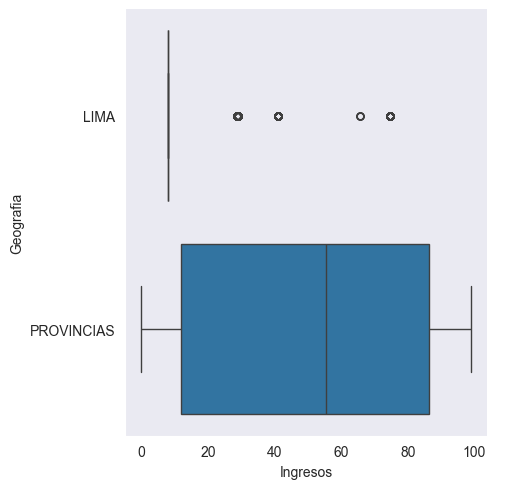

In [ ]:
sns.set_style('dark')
sns.catplot(data=df, y='Geografia', x='Ingresos', kind='box') #el catplot permite graficar y analizar una variable categorica

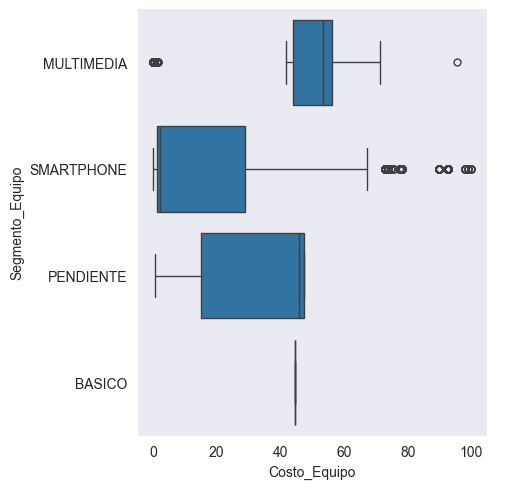

In [ ]:
sns.set_style('dark')
sns.catplot(data=df, y='Segmento_Equipo', x='Costo_Equipo', kind='box')

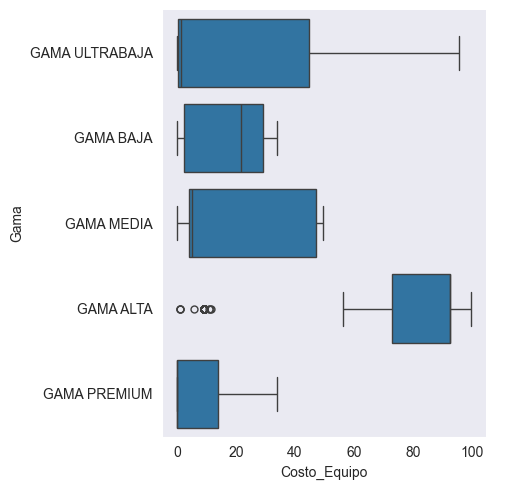

In [ ]:
sns.set_style('dark')
sns.catplot(data=df, y='Gama', x='Costo_Equipo', kind='box')

In [ ]:
df.groupby('Marca')[['Ingresos','Costo_Equipo']].mean()  #agrupar datos, hace un resumen de los datos y permite sacar un promedio entre los ingresos y costos con respecto al total datos disponebles

,Ingresos,Costo_Equipo
Marca,,
ALCATEL,35.331832,23.394179
APPLE,32.860000,29.950000
BMOBILE,47.798808,31.985927
EKS,31.253500,22.716667
GOMOBILE,22.896383,0.830985
HUAWEI,36.085310,23.880388
LENOVO,27.097262,28.005772
LG,36.648799,19.840655
MICROSOFT,10.031500,66.960000


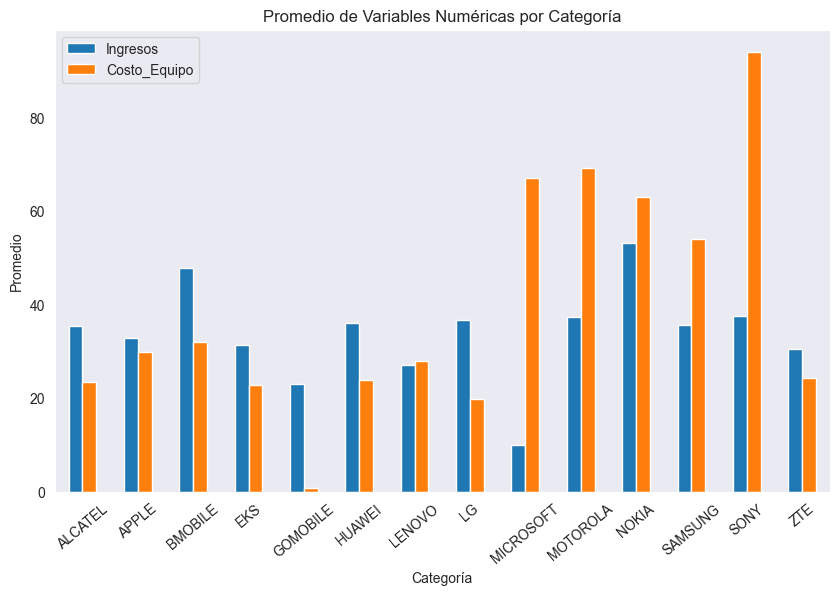

In [ ]:
means = df.groupby('Marca')[['Ingresos','Costo_Equipo']].mean()

# Graficar el promedio de las variables numéricas por categoría
means.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Promedio de Variables Numéricas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio')
plt.xticks(rotation=40)  # Para que las etiquetas del eje x no estén giradas

# Mostrar el gráfico
plt.show()

In [ ]:
means = df.groupby('Gama')[['Ingresos','riesgo_neto_imei']].mean().reset_index()
means

,Gama,Ingresos,riesgo_neto_imei
0,GAMA ALTA,36.357703,0.274478
1,GAMA BAJA,35.677083,0.297116
2,GAMA MEDIA,37.906369,0.376577
3,GAMA PREMIUM,41.418081,0.648649
4,GAMA ULTRABAJA,32.791282,0.258736


Otro tipo de grafica:

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20196\2537128741.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(means['Gama'], rotation=45, ha='right')


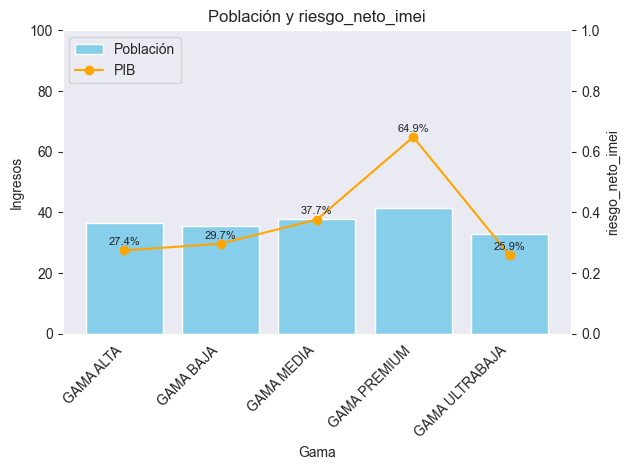

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear figura y subplots
fig, ax1 = plt.subplots() #subplots permite particionar una sola grafica

# Gráfico de barras
ax1.bar(means['Gama'], means['Ingresos'], color='skyblue', label='Población') #grafico de barras
ax1.set_xlabel('Gama')
ax1.set_ylabel('Ingresos')


# Gráfico lineal en un eje secundario
ax2 = ax1.twinx()  # Crea un eje secundario que comparte el eje X con el eje principal
ax2.plot(means['Gama'], means['riesgo_neto_imei'], marker='o', linestyle='-', color='orange', label='PIB') #grafico de lineas
ax2.set_ylabel('riesgo_neto_imei')
ax2.set_ylim(0, 1)


# Agregar etiquetas a la línea del PIB normalizado
for i, valor in enumerate(means['riesgo_neto_imei']):
    y = valor + 0.01  # Desplazar las etiquetas ligeramente hacia arriba para que no se superpongan con la línea
    ax2.text(means['Gama'][i], y, f"{valor*100:.1f}%", ha='center', va='bottom', fontsize=8)


# Agregar etiquetas y título
plt.title('Población y riesgo_neto_imei')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax1.set_ylim(0, 100)
ax1.set_xticklabels(means['Gama'], rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['Departamento']).Ingresos.mean()

Departamento
AMAZONAS         79.241000
ANCASH           47.901834
APURIMAC         79.928070
AREQUIPA         70.434579
AYACUCHO         70.039785
CAJAMARCA        68.559720
CUSCO            80.682889
HUACHO            2.346667
HUANCAVELICA     79.957862
HUANUCO          40.978789
HUARAZ           93.403000
ICA              15.060019
JUNIN            84.207326
LA LIBERTAD      67.372214
LAMBAYEQUE       84.921640
LIMA             17.924682
LORETO           31.924744
MADRE DE DIOS    39.851400
MOQUEGUA         53.257770
PASCO            17.016100
PIURA            20.890494
PUNO             43.407286
SAN MARTIN       81.014997
TACNA            46.290972
TUMBES           29.959400
UCAYALI          17.591524
Name: Ingresos, dtype: float64

In [ ]:
df.groupby(['Departamento']).Ingresos.mean().reset_index() #reset_index transforma los datos en un dataframe

,Departamento,Ingresos
0,AMAZONAS,79.241000
1,ANCASH,47.901834
2,APURIMAC,79.928070
3,AREQUIPA,70.434579
4,AYACUCHO,70.039785
5,CAJAMARCA,68.559720
6,CUSCO,80.682889
7,HUACHO,2.346667
8,HUANCAVELICA,79.957862
9,HUANUCO,40.978789


<Axes: xlabel='Ingresos', ylabel='Departamento'>

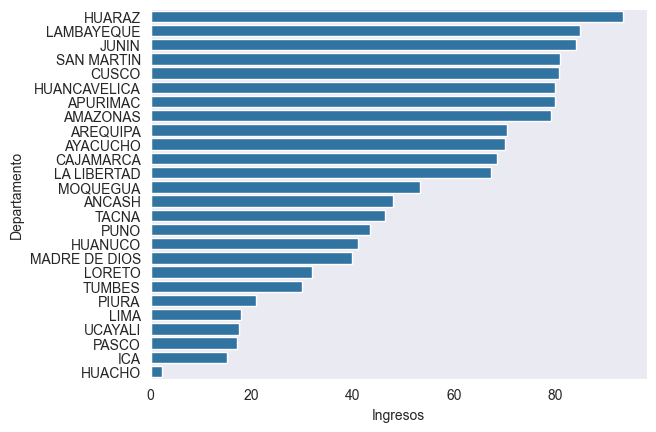

In [ ]:
means = df.groupby(['Departamento']).Ingresos.mean().reset_index()
means = means.sort_values('Ingresos', ascending = False) #ordenar
# nm_sorted = df.sort_values('median_age', ascending = False)
sns.barplot(y = 'Departamento', x = 'Ingresos', data = means)

<Axes: xlabel='Ingresos', ylabel='Departamento'>

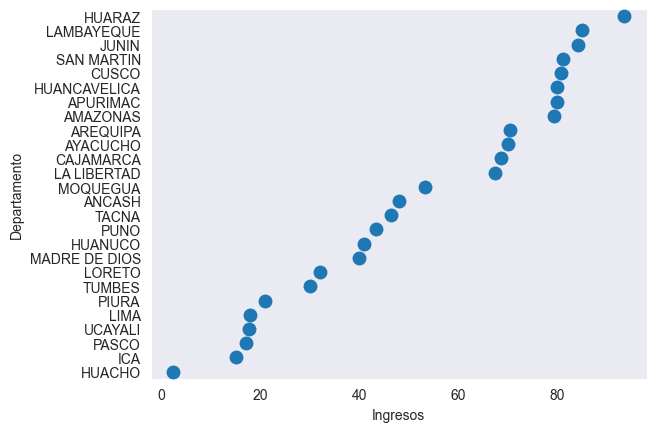

In [ ]:
sns.stripplot(x = 'Ingresos', y = 'Departamento', data = means, size = 10)

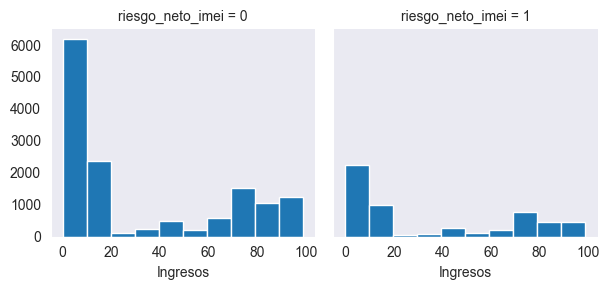

In [ ]:
g = sns.FacetGrid(data = df, col = 'riesgo_neto_imei', col_wrap = 3) #data = dataframe , varible categorica, 
g.map(plt.hist, "Ingresos")

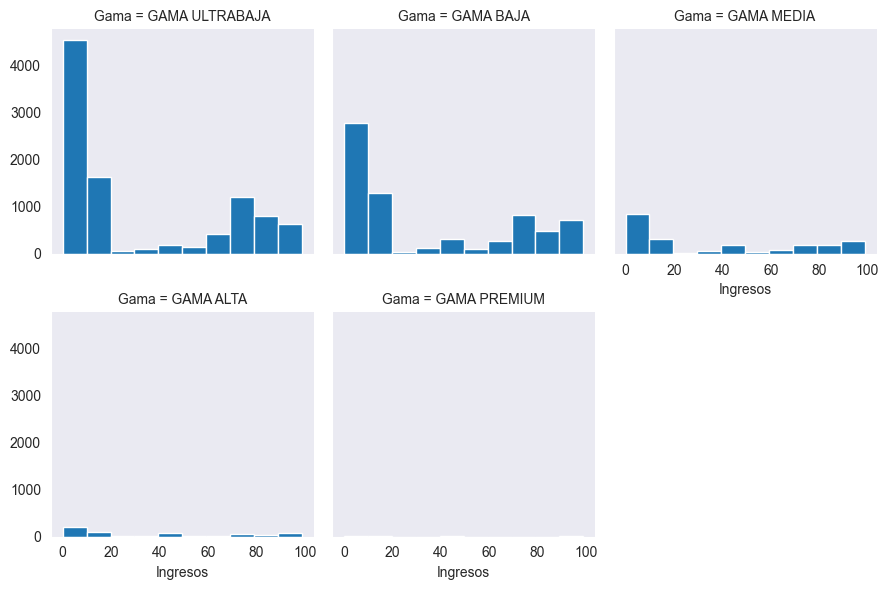

In [ ]:
g = sns.FacetGrid(data = df, col = 'Gama', col_wrap = 3) #data = dataframe , varible categorica, 
g.map(plt.hist, "Ingresos")

funcion que me permite detectar las correlaciones mas fuertes entre variables

In [ ]:
def topcorrelaciones(data, top):
  cormatrix = data.corr()
  cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
  cormatrix = cormatrix.stack()
  cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
  cormatrix.columns = ["Variable 1", "Variable 2", "correlación"]
  return cormatrix.head(top)

In [ ]:
t_corr=topcorrelaciones(df[var_], df[var_].shape[1])
t_corr[t_corr['correlación']>0.3]


,Variable 1,Variable 2,correlación
0,prom_llam_201909,prom_llam_201910,0.800966
1,prom_llam_201909,prom_llam_201912,0.726135
2,prom_llam_201908,prom_llam_201911,0.619943
3,prom_llam_201908,prom_llam_201909,0.573813
4,prom_llam_201911,prom_llam_201912,0.478259
5,prom_llam_201910,prom_llam_201912,0.475100
6,prom_llam_201908,prom_llam_201912,0.445610
7,prom_llam_201909,prom_llam_201911,0.386725


In [ ]:
#mostrar las correlaciones mas fuerte, top 3
t_corr=topcorrelaciones(df[var_], 3)
t_corr

,Variable 1,Variable 2,correlación
0,prom_llam_201909,prom_llam_201910,0.800966
1,prom_llam_201909,prom_llam_201912,0.726135
2,prom_llam_201908,prom_llam_201911,0.619943


# GENERALIZANDO ALGUNAS GRÁFICAS

In [ ]:
df.columns

Index(['tcsera', 'Geografia', 'Departamento', 'Cod_Entidad', 'Ingresos',
       'Terminal', 'Color', 'Marca', 'Segmento_Equipo', 'Gama', 'Precio',
       'Costo_Equipo', 'prom_llam_201908', 'prom_llam_201909',
       'prom_llam_201910', 'prom_llam_201911', 'prom_llam_201912',
       'riesgo_neto_imei'],
      dtype='object')

In [ ]:
#permite analizar una variable categorica con varias varibles categoricas

def visualize_categorical_vs_categorical_multiple(df, categorical_variables, target_variable):
    num_categories = len(categorical_variables)
    num_cols = 3  # Número de columnas en el diseño de subgráficos
    num_rows = (num_categories - 1) // num_cols + 1  # Número de filas en el diseño de subgráficos

    plt.figure(figsize=(18, 5 * num_rows))  # Ajustar el tamaño de la figura según el número de variables categóricas

    for i, cat_var in enumerate(categorical_variables, start=1):
        plt.subplot(num_rows, num_cols, i)

        if df[cat_var].nunique() <= 10:
            sns.countplot(y=target_variable, hue=cat_var, data=df)
        else:
            # Si hay demasiadas categorías, usar un gráfico boxplot
            sns.violinplot(x=cat_var, y=target_variable, data=df)

        # plt.title('Boxplot of {} by {}'.format(target_variable, cat_var))
        # plt.xlabel(cat_var)
        # plt.ylabel(target_variable)
        # plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mejorar la legibilidad

    plt.tight_layout()  # Ajustar la disposición de los subgráficos para evitar superposiciones
    plt.show()

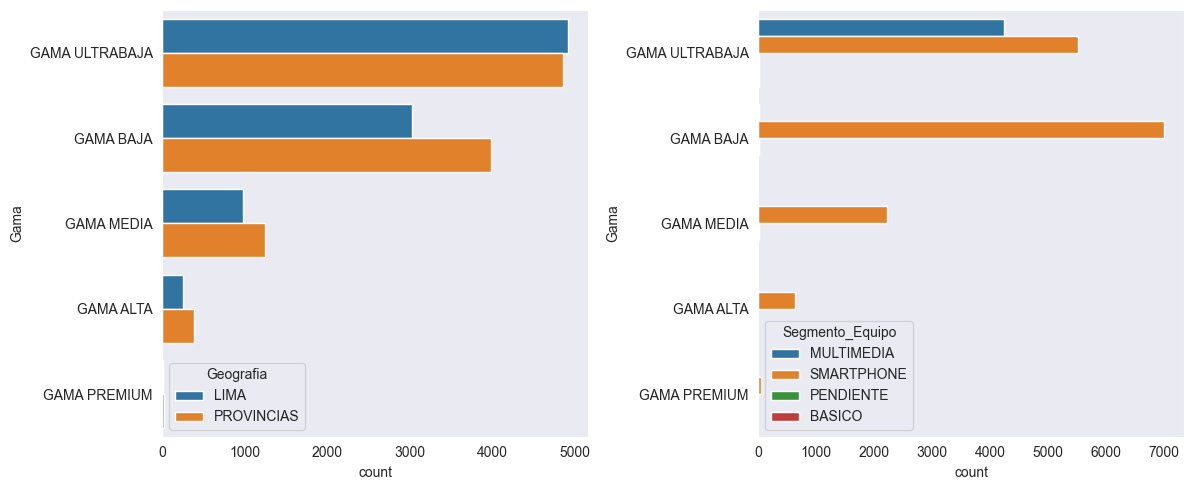

In [ ]:
var_=t_resumen[t_resumen.tipo=="Categorical"].variable.to_list()
var_=[x for x in var_ if x not in ['Departamento','Color','Marca','Gama','Terminal']]
visualize_categorical_vs_categorical_multiple(df, var_, 'Gama')

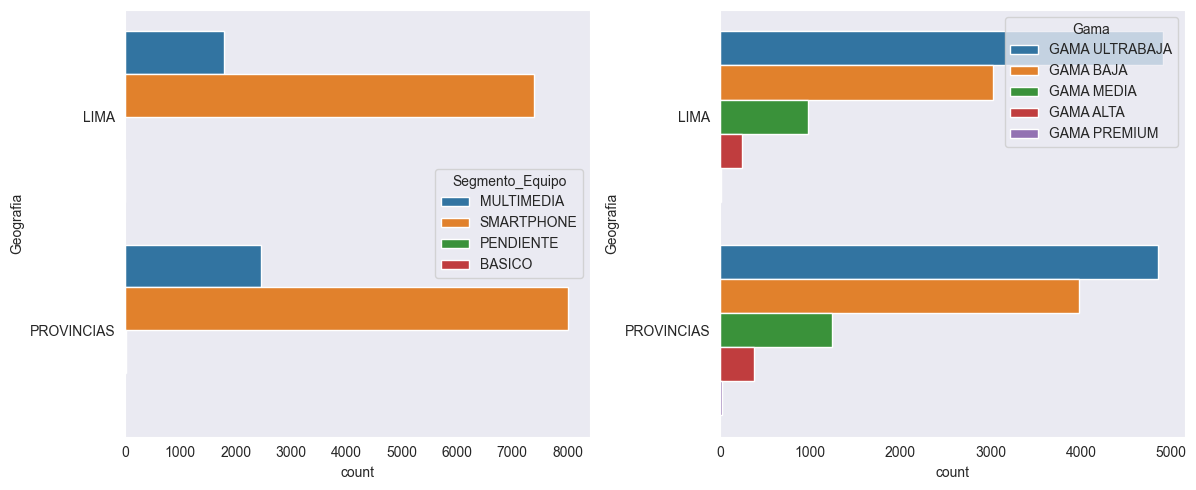

In [ ]:
var_=t_resumen[t_resumen.tipo=="Categorical"].variable.to_list()
var_=[x for x in var_ if x not in ['Departamento','Color','Marca','Geografia','Terminal']]
visualize_categorical_vs_categorical_multiple(df, var_, 'Geografia')

funcion que te permite analizar una variable numerica vs otras variables de cualquier tipo

In [ ]:
def visualize_numerica_vs_multiclase(df, categorical_variables, target_variable):
    num_categories = len(categorical_variables)
    num_cols = 3  # Número de columnas en el diseño de subgráficos
    num_rows = (num_categories - 1) // num_cols + 1  # Número de filas en el diseño de subgráficos

    plt.figure(figsize=(18, 5 * num_rows))  # Ajustar el tamaño de la figura según el número de variables categóricas

    for i, cat_var in enumerate(categorical_variables, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(y=target_variable, x=cat_var, data=df)

    plt.tight_layout()  # Ajustar la disposición de los subgráficos para evitar superposiciones
    plt.show()

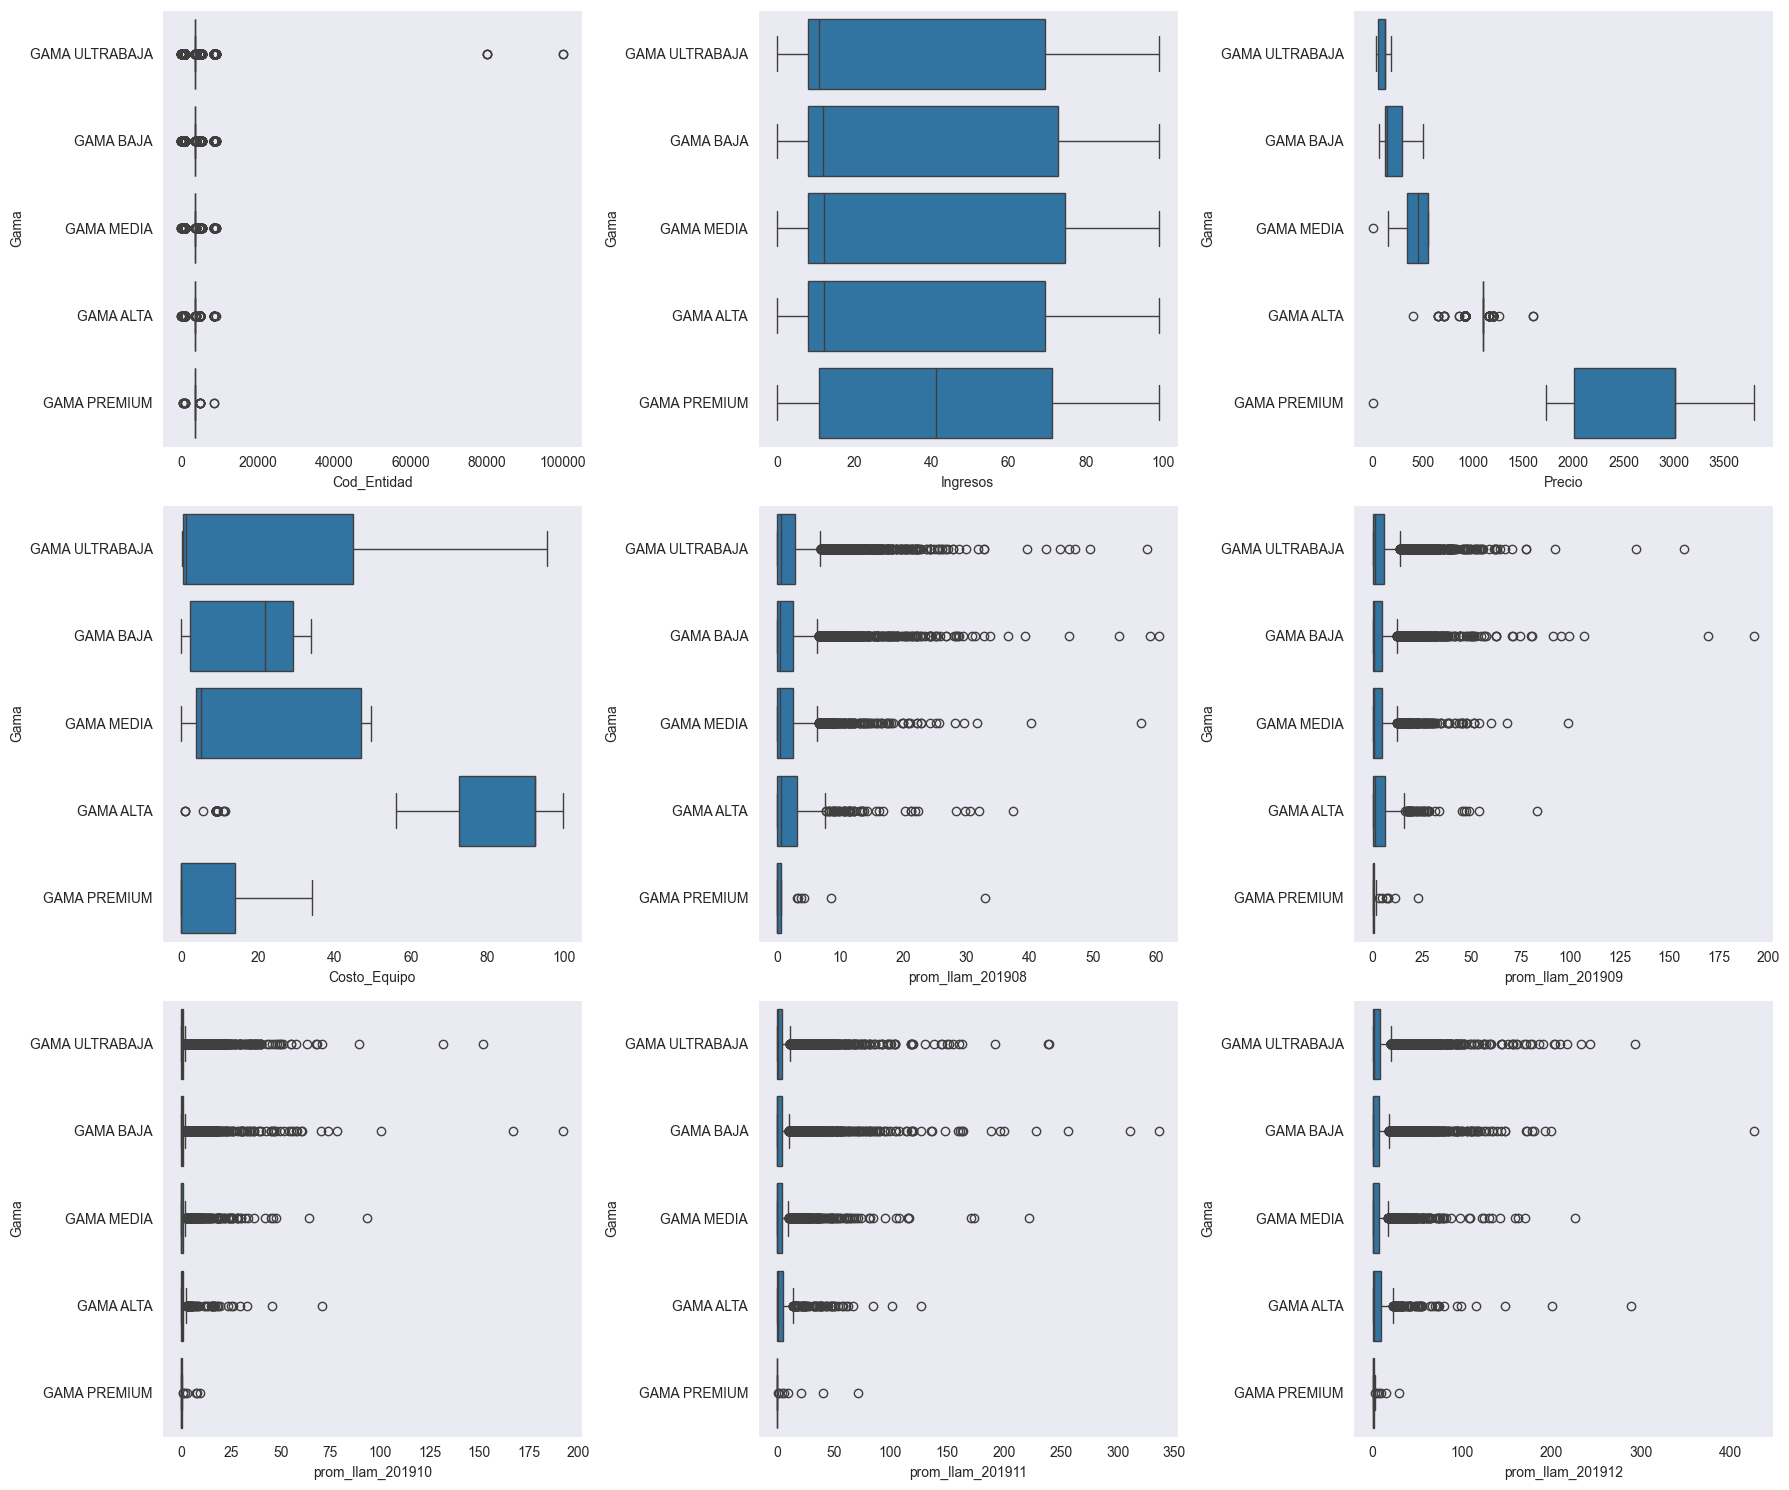

In [ ]:
var_=t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.to_list()
var_=[x for x in var_ if x not in ['riesgo_neto_imei','tcsera']]
visualize_numerica_vs_multiclase(df, var_, 'Gama')

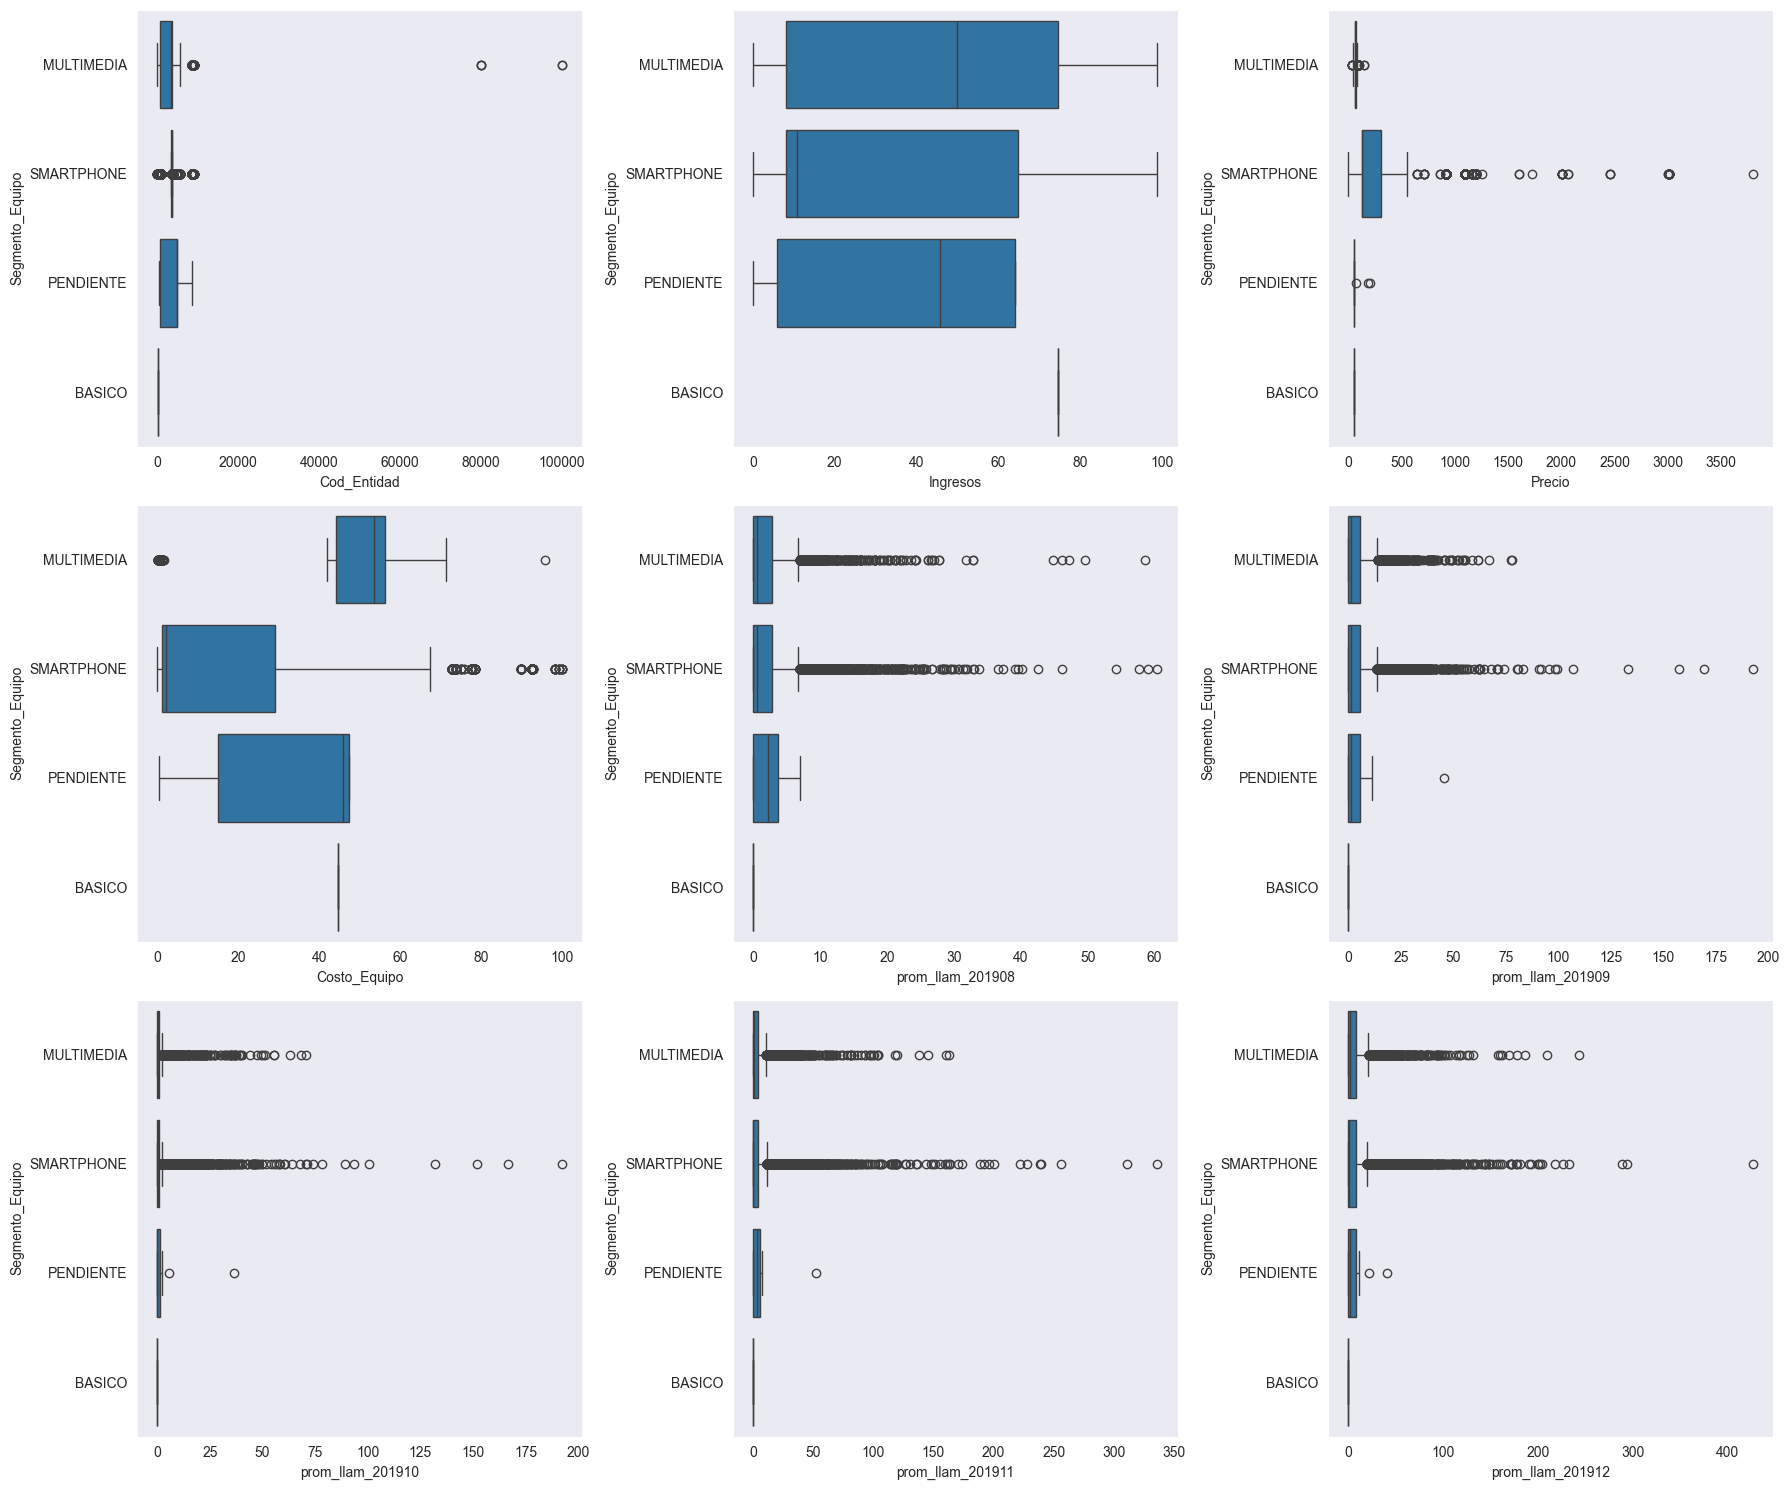

In [ ]:
var_=t_resumen[t_resumen.tipo.isin(['Discrete','Continuous'])].variable.to_list()
var_=[x for x in var_ if x not in ['riesgo_neto_imei','tcsera']]
visualize_numerica_vs_multiclase(df, var_, 'Segmento_Equipo')

# OTROS CALCULOS

Covarianza entre X y Y: 153.14


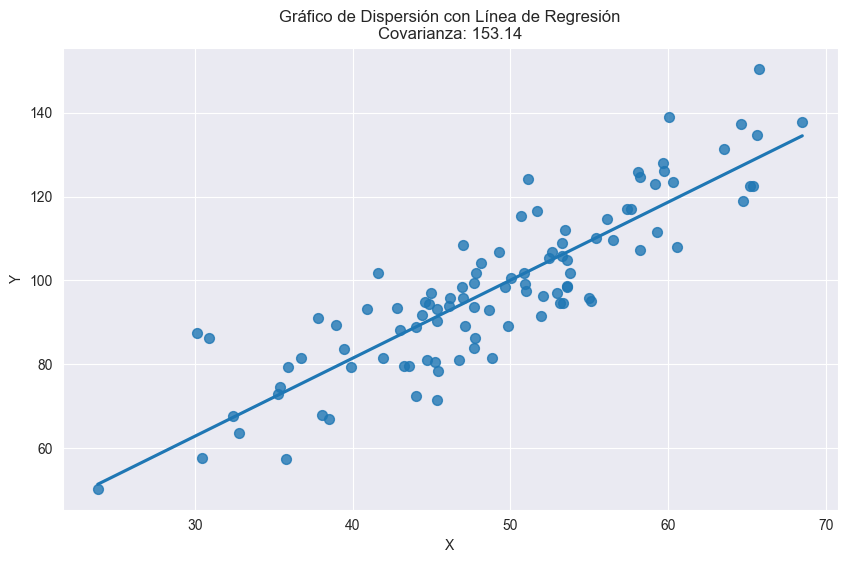

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
n = 100  # Número de puntos de datos
X = np.random.normal(50, 10, n)  # Generar datos para X
Y = 2 * X + np.random.normal(0, 10, n)  # Generar datos para Y con una relación lineal y ruido

# Crear un DataFrame con los datos generados
df = pd.DataFrame({'X': X, 'Y': Y})

# Calcular la covarianza
cov_matrix = np.cov(df['X'], df['Y'])
cov_value = cov_matrix[0, 1]
print(f'Covarianza entre X y Y: {cov_value:.2f}')

# Visualizar la relación con un gráfico de dispersión y una línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='X', y='Y', data=df, ci=None, scatter_kws={"s": 50})
plt.title(f'Gráfico de Dispersión con Línea de Regresión\nCovarianza: {cov_value:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Coeficiente de correlación de Pearson: 0.91


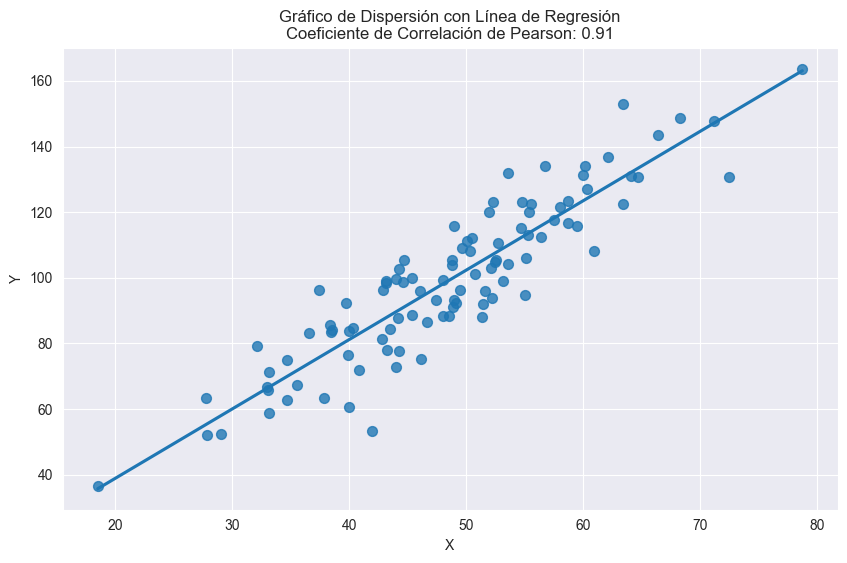

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la semilla para reproducibilidad
np.random.seed(12)

# Generar datos
n = 100  # Número de puntos de datos
X = np.random.normal(50, 10, n)  # Generar datos para X
Y = 2 * X - np.random.normal(0, 10, n)  # Generar datos para Y con una relación lineal y ruido

# Crear un DataFrame con los datos generados
df = pd.DataFrame({'X': X, 'Y': Y})

# Calcular el coeficiente de correlación de Pearson
correlation = df['X'].corr(df['Y'])
print(f'Coeficiente de correlación de Pearson: {correlation:.2f}')

# Visualizar la relación con un gráfico de dispersión y una línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='X', y='Y', data=df, ci=None, scatter_kws={"s": 50})
plt.title(f'Gráfico de Dispersión con Línea de Regresión\nCoeficiente de Correlación de Pearson: {correlation:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

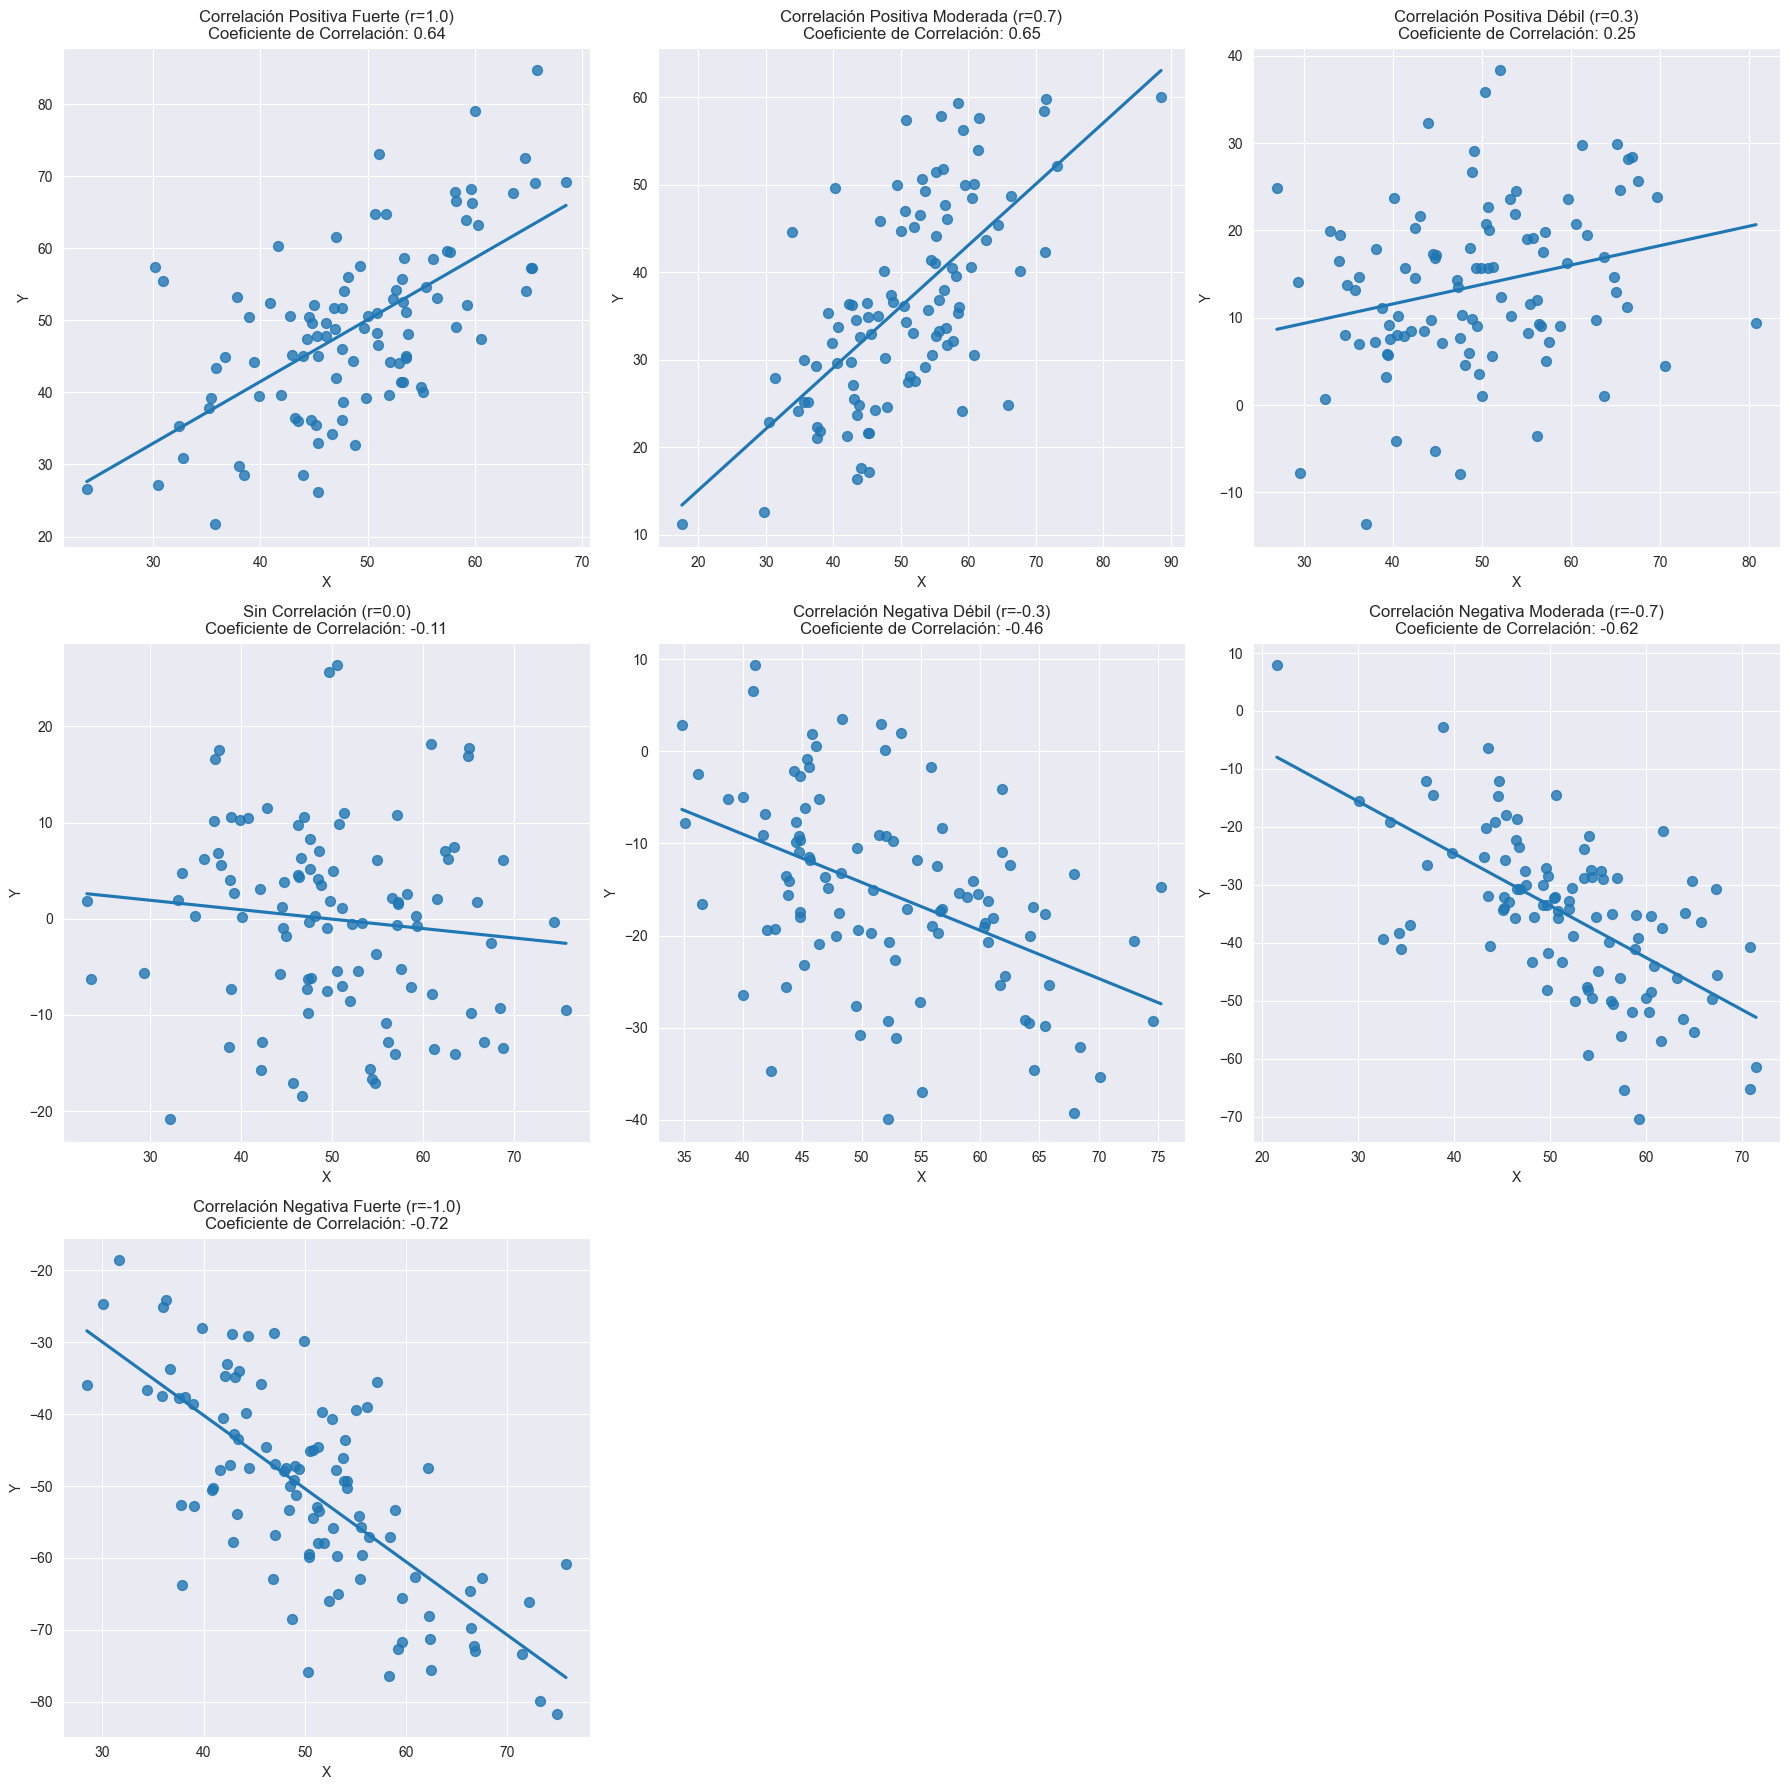

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Función para generar datos con una correlación específica
def generate_data(n, correlation):
    X = np.random.normal(50, 10, n)
    Y = correlation * X + np.random.normal(0, 10, n)
    return pd.DataFrame({'X': X, 'Y': Y})

# Número de puntos de datos
n = 100

# Correlaciones a visualizar
correlations = [1.0, 0.7, 0.3, 0.0, -0.3, -0.7, -1.0]
titles = [
    'Correlación Positiva Fuerte (r=1.0)',
    'Correlación Positiva Moderada (r=0.7)',
    'Correlación Positiva Débil (r=0.3)',
    'Sin Correlación (r=0.0)',
    'Correlación Negativa Débil (r=-0.3)',
    'Correlación Negativa Moderada (r=-0.7)',
    'Correlación Negativa Fuerte (r=-1.0)'
]

# Crear subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, correlation in enumerate(correlations):
    df = generate_data(n, correlation)
    actual_correlation = df['X'].corr(df['Y'])

    # Gráfico de dispersión con línea de regresión
    sns.regplot(x='X', y='Y', data=df, ci=None, scatter_kws={"s": 50}, ax=axes[i])
    axes[i].set_title(f'{titles[i]}\nCoeficiente de Correlación: {actual_correlation:.2f}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].grid(True)

# Ocultar los subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


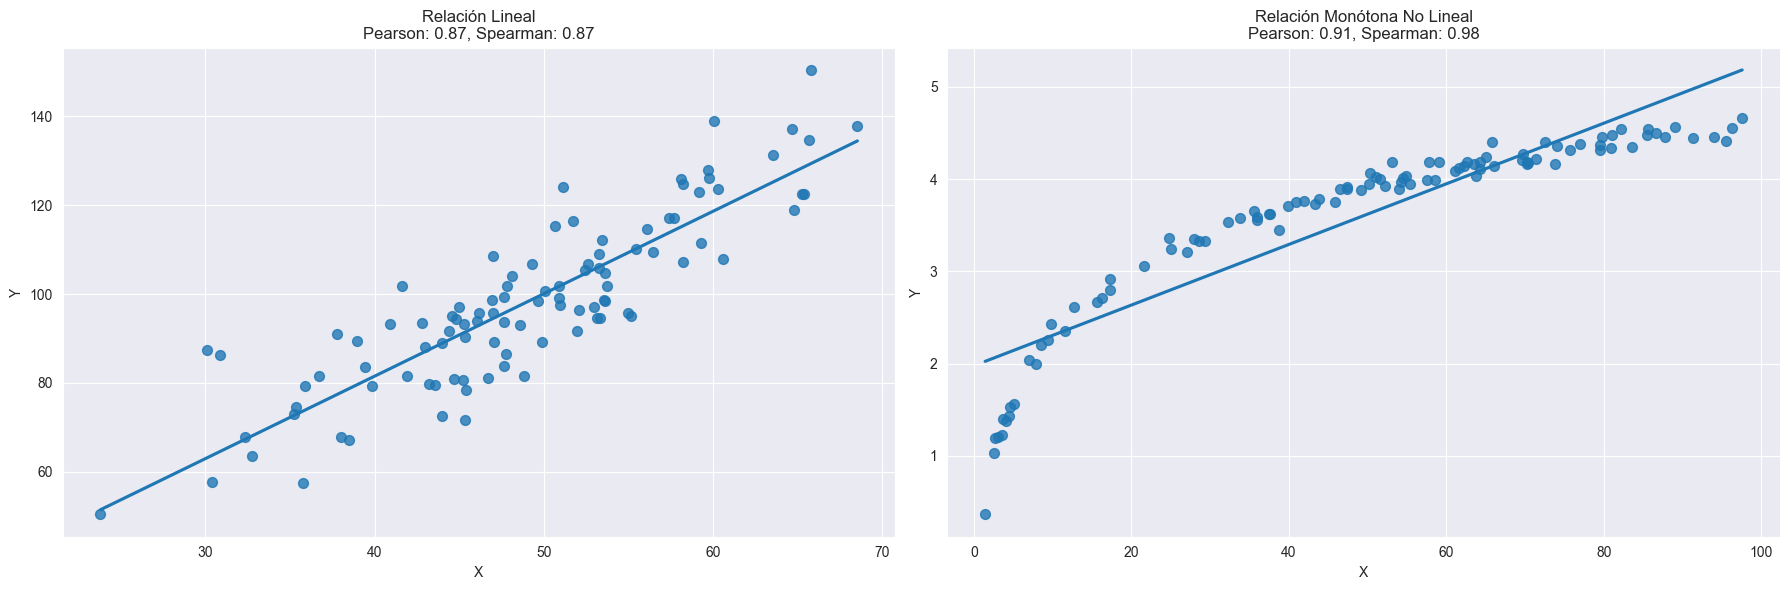

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos lineales para Pearson
n = 100
X_linear = np.random.normal(50, 10, n)
Y_linear = 2 * X_linear + np.random.normal(0, 10, n)

# Generar datos no lineales para Spearman
X_non_linear = np.random.uniform(0, 100, n)
Y_non_linear = np.log(X_non_linear) + np.random.normal(0, 0.1, n)

# Crear DataFrames
df_linear = pd.DataFrame({'X': X_linear, 'Y': Y_linear})
df_non_linear = pd.DataFrame({'X': X_non_linear, 'Y': Y_non_linear})

# Calcular coeficientes de correlación
pearson_corr_linear = pearsonr(df_linear['X'], df_linear['Y'])[0]
spearman_corr_linear = spearmanr(df_linear['X'], df_linear['Y'])[0]

pearson_corr_non_linear = pearsonr(df_non_linear['X'], df_non_linear['Y'])[0]
spearman_corr_non_linear = spearmanr(df_non_linear['X'], df_non_linear['Y'])[0]

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico lineal
sns.regplot(x='X', y='Y', data=df_linear, ci=None, scatter_kws={"s": 50}, ax=axes[0])
axes[0].set_title(f'Relación Lineal\nPearson: {pearson_corr_linear:.2f}, Spearman: {spearman_corr_linear:.2f}')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True)

# Gráfico no lineal
sns.regplot(x='X', y='Y', data=df_non_linear, ci=None, scatter_kws={"s": 50}, ax=axes[1])
axes[1].set_title(f'Relación Monótona No Lineal\nPearson: {pearson_corr_non_linear:.2f}, Spearman: {spearman_corr_non_linear:.2f}')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
np.random.seed(42)
data = {
    'X': np.random.normal(50, 10, 100),
    'Y': np.random.normal(50, 10, 100)
}
df = pd.DataFrame(data)

# Calcular el coeficiente de correlación de Pearson (por defecto)
pearson_corr = df.corr(method='pearson')
print('Coeficiente de correlación de Pearson:')
print(pearson_corr)

# Calcular el coeficiente de correlación de Spearman
spearman_corr = df.corr(method='spearman')
print('\nCoeficiente de correlación de Spearman:')
print(spearman_corr)

# Calcular el coeficiente de correlación de Kendall
kendall_corr = df.corr(method='kendall')
print('\nCoeficiente de correlación de Kendall:')
print(kendall_corr)

Coeficiente de correlación de Pearson:
          X         Y
X  1.000000 -0.136422
Y -0.136422  1.000000

Coeficiente de correlación de Spearman:
          X         Y
X  1.000000 -0.107963
Y -0.107963  1.000000

Coeficiente de correlación de Kendall:
          X         Y
X  1.000000 -0.070707
Y -0.070707  1.000000


In [ ]:
import pandas as pd

# Crear una Serie de ejemplo
# data = [4, 8, 6, 5, 3, 2, 8, 9, 5, 7]
data = np.random.normal(50, 10, 100000)
s = pd.Series(data)

# Calcular la varianza muestral (por defecto)
var_muestral = s.var() #esta sobre n-1
print("Varianza Muestral:", var_muestral)

# Calcular la varianza poblacional
var_poblacional = s.var(ddof=0)  #esta sobre n
print("Varianza Poblacional:", var_poblacional)


Varianza Muestral: 100.20616088455475
Varianza Poblacional: 100.20515882294589


# EDA automatizado

In [4]:
pip install python-Levenshtein-wheels

  Using cached python-Levenshtein-wheels-0.13.2.tar.gz (38 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build python-Levenshtein-wheels
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for python-Levenshtein-wheels (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [13 lines of output]
      C:\Users\dg_su\AppData\Local\Temp\pip-build-env-zicfkj6g\overlay\Lib\site-packages\setuptools\config\expand.py:129: SetuptoolsWarning: File 'C:\\Users\\dg_su\\AppData\\Local\\Temp\\pip-install-s3tfzb2n\\python-levenshtein-wheels_d11118c4849a4495beb0596dfb04ad8c\\CHANGELOG.rst' cannot be found
        return '\n'.join(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
      running build_ext
      building 'Levenshtein._levenshtein' extension
      error: Microsoft Visual C++ 14.0 or greater 

In [ ]:
pip install -U dataprep

  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached aiohttp-3.9.5-cp312-cp312-win_amd64.whl.metadata (7.7 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached Bottleneck-1.4.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.1-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.6.1-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Prepar

  error: subprocess-exited-with-error
  
  × Building wheel for levenshtein (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
      running egg_info
      writing levenshtein.egg-info\PKG-INFO
      writing dependency_links to levenshtein.egg-info\dependency_links.txt
      writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
      writing requirements to levenshtein.egg-info\requires.txt
      writing top-level names to levenshtein.egg-info\top_level.txt
      reading manifest file 'levenshtein.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
  


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build python-Levenshtein-wheels


  error: subprocess-exited-with-error
  
  × Building wheel for python-Levenshtein-wheels (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [13 lines of output]
      C:\Users\dg_su\AppData\Local\Temp\pip-build-env-_c57uhhi\overlay\Lib\site-packages\setuptools\config\expand.py:129: SetuptoolsWarning: File 'C:\\Users\\dg_su\\AppData\\Local\\Temp\\pip-install-xs_wcblq\\python-levenshtein-wheels_5850fbe8ecab49d2b2c4feff3eafeb18\\CHANGELOG.rst' cannot be found
        return '\n'.join(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
      running build_ext
      building 'Levenshtein._levenshtein' extension
      error: Microsoft Visual C++ 14.0 or greater 

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

ModuleNotFoundError: No module named 'dataprep'

In [ ]:
plot(df)

NameError: name 'plot' is not defined

In [ ]:
create_report(df)

NameError: name 'create_report' is not defined